<a href="https://colab.research.google.com/github/IPonD2002/LiverDisease_DsPj/blob/main/LiverDiseaseClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

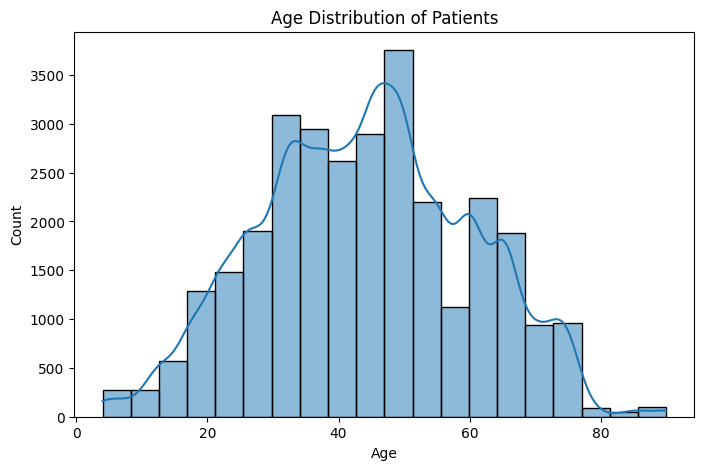

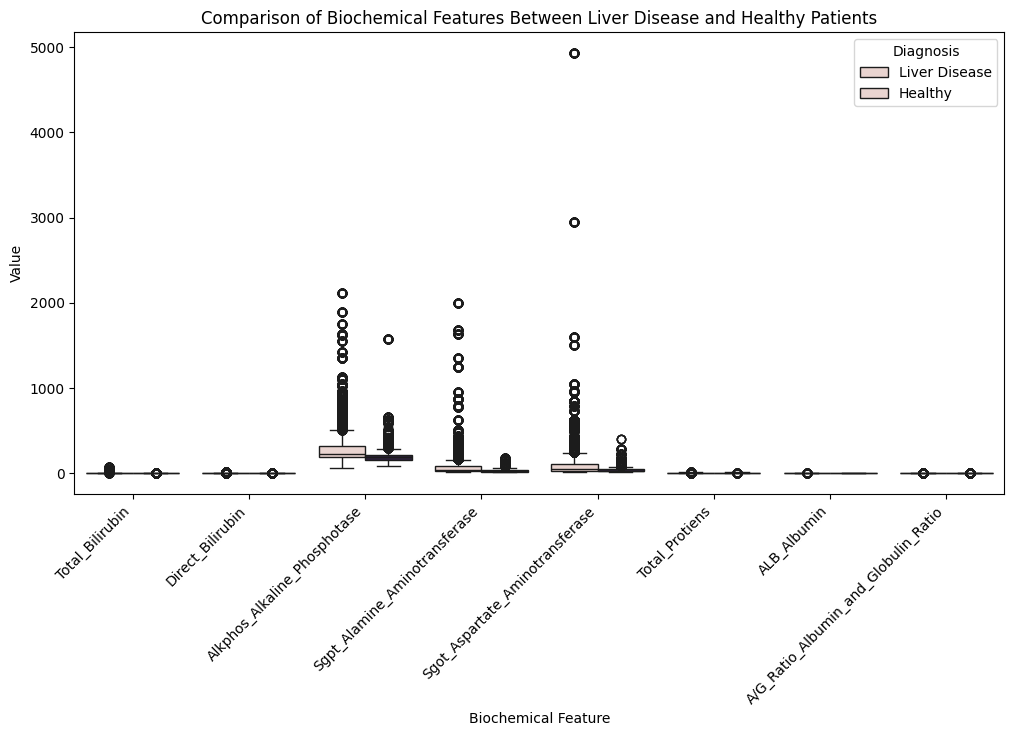

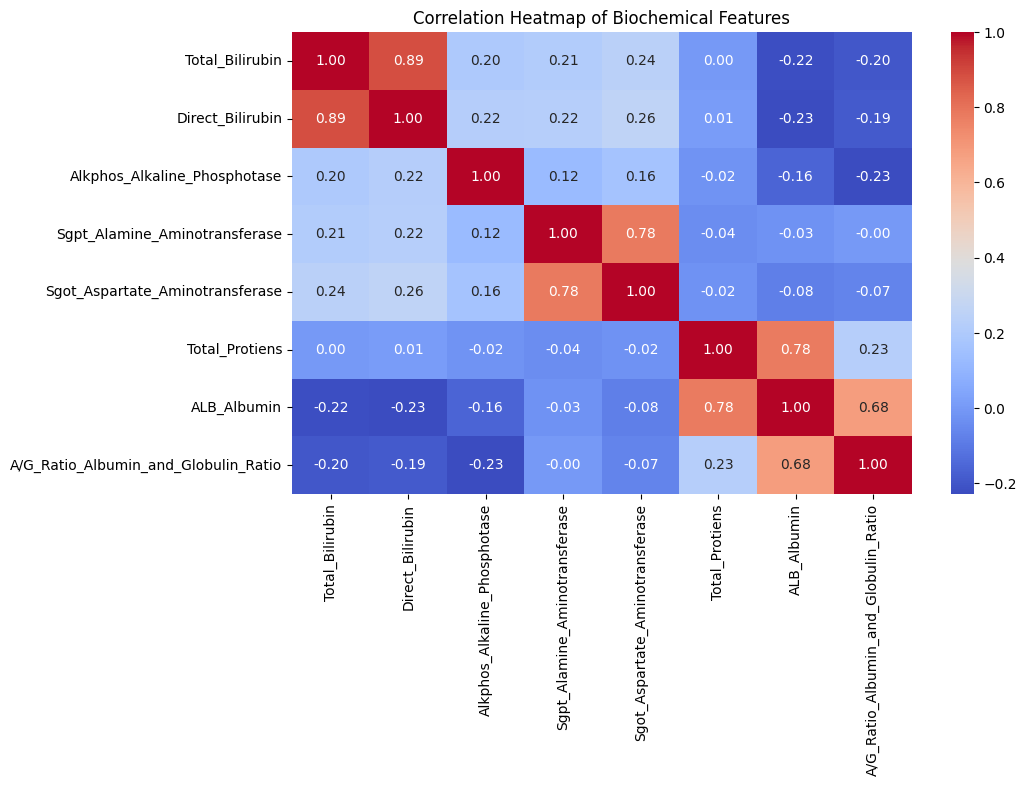

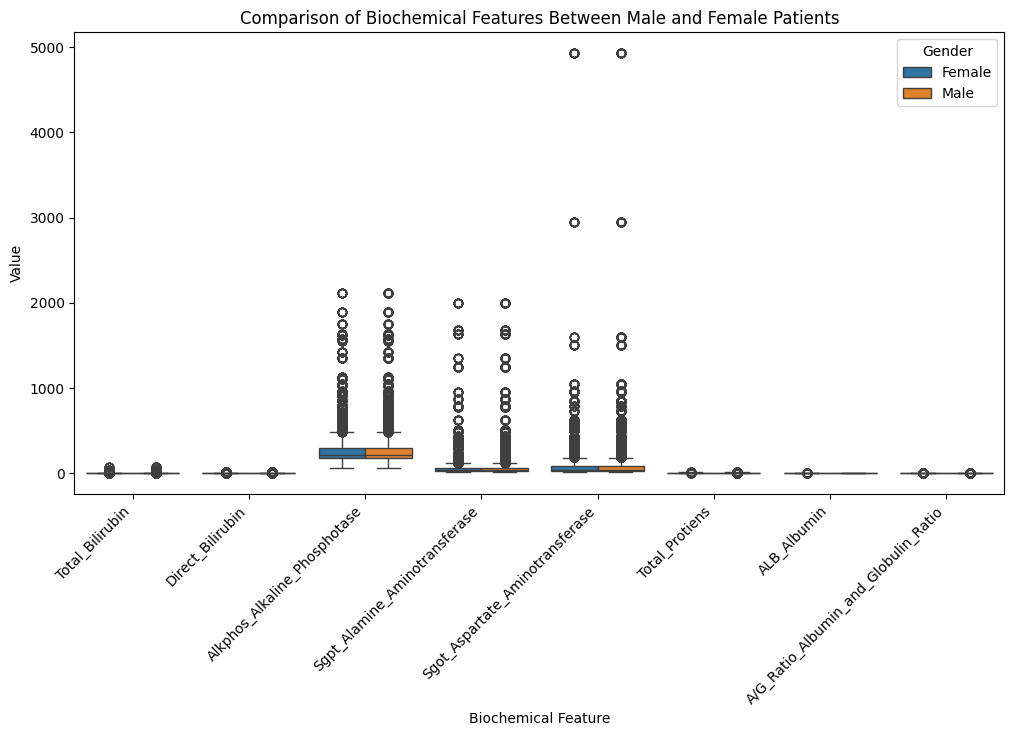

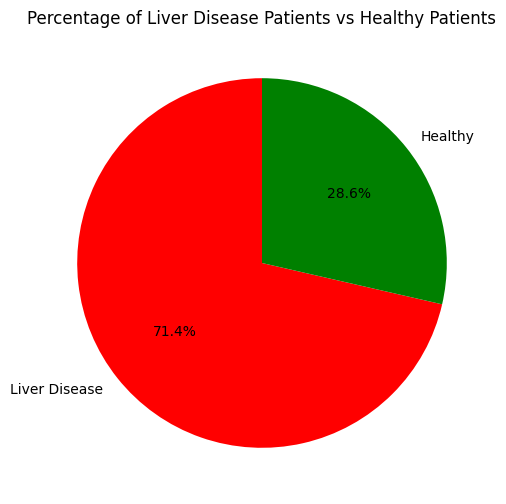

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# โหลดข้อมูล
file_path = "/content/LPD.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# ทำความสะอาดชื่อคอลัมน์
df.columns = df.columns.str.strip().str.replace(" ", "_")

# 1️⃣ Histogram - การกระจายตัวของอายุผู้ป่วย
plt.figure(figsize=(8, 5))
sns.histplot(df["Age_of_the_patient"], bins=20, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 2️⃣ Boxplot - เปรียบเทียบค่าชีวเคมีระหว่างผู้ป่วยโรคตับกับผู้ที่ไม่มีโรค
biochemical_features = ["Total_Bilirubin", "Direct_Bilirubin", "Alkphos_Alkaline_Phosphotase",
                        "Sgpt_Alamine_Aminotransferase", "Sgot_Aspartate_Aminotransferase",
                        "Total_Protiens", "ALB_Albumin", "A/G_Ratio_Albumin_and_Globulin_Ratio"]

plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=["Result"], value_vars=biochemical_features, var_name="Feature", value_name="Value")
sns.boxplot(x="Feature", y="Value", hue="Result", data=df_melted)
plt.xticks(rotation=45, ha="right")
plt.title("Comparison of Biochemical Features Between Liver Disease and Healthy Patients")
plt.xlabel("Biochemical Feature")
plt.ylabel("Value")
plt.legend(title="Diagnosis", labels=["Liver Disease", "Healthy"])
plt.show()

# 3️⃣ Heatmap - ความสัมพันธ์ระหว่างค่าทางชีวเคมี
plt.figure(figsize=(10, 6))
correlation_matrix = df[biochemical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Biochemical Features")
plt.show()

# 4️⃣ Boxplot - เปรียบเทียบค่าชีวเคมีของเลือดระหว่างเพศชายและหญิง
plt.figure(figsize=(12, 6))
df_melted_gender = df.melt(id_vars=["Gender_of_the_patient"], value_vars=biochemical_features, var_name="Feature", value_name="Value")
sns.boxplot(x="Feature", y="Value", hue="Gender_of_the_patient", data=df_melted_gender)
plt.xticks(rotation=45, ha="right")
plt.title("Comparison of Biochemical Features Between Male and Female Patients")
plt.xlabel("Biochemical Feature")
plt.ylabel("Value")
plt.legend(title="Gender")
plt.show()

# 5️⃣ Pie Chart - อัตราส่วนผู้ป่วยโรคตับเทียบกับกลุ่มสุขภาพดี
plt.figure(figsize=(6, 6))
df["Result"].value_counts().plot.pie(autopct="%1.1f%%", labels=["Liver Disease", "Healthy"], colors=["red", "green"], startangle=90)
plt.title("Percentage of Liver Disease Patients vs Healthy Patients")
plt.ylabel("")
plt.show()


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


filepath = "/content/LPD.csv"
df = pd.read_csv(filepath,encoding='latin-1')

In [ ]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [ ]:
print("\nขนาดของข้อมูล (Rows x Columns):", df.shape)


ขนาดของข้อมูล (Rows x Columns): (30691, 11)


In [ ]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [ ]:
duplicate_rows = df[df.duplicated()]
print(f"พบข้อมูลที่ซ้ำกันทั้งหมด {duplicate_rows.shape[0]} แถว")

พบข้อมูลที่ซ้ำกันทั้งหมด 11323 แถว


In [ ]:
df[df.duplicated()]


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
19,40.0,Female,0.9,0.3,293.0,232.0,245.0,6.8,3.1,0.8,1
26,34.0,Male,4.1,2.0,289.0,875.0,731.0,5.0,2.7,1.1,1
34,38.0,Female,2.6,1.2,410.0,59.0,57.0,5.6,3.0,0.8,2
55,42.0,Male,8.9,4.5,272.0,31.0,61.0,5.8,2.0,0.5,1
62,58.0,Male,1.0,0.5,158.0,37.0,43.0,7.2,3.6,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
30683,58.0,NaN,NaN,NaN,275.0,48.0,178.0,6.5,3.2,0.9,2
30684,51.0,Male,0.9,0.3,293.0,232.0,245.0,6.8,3.1,0.8,1
30685,50.0,Male,0.9,0.3,293.0,232.0,245.0,6.8,3.1,0.8,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.5,1


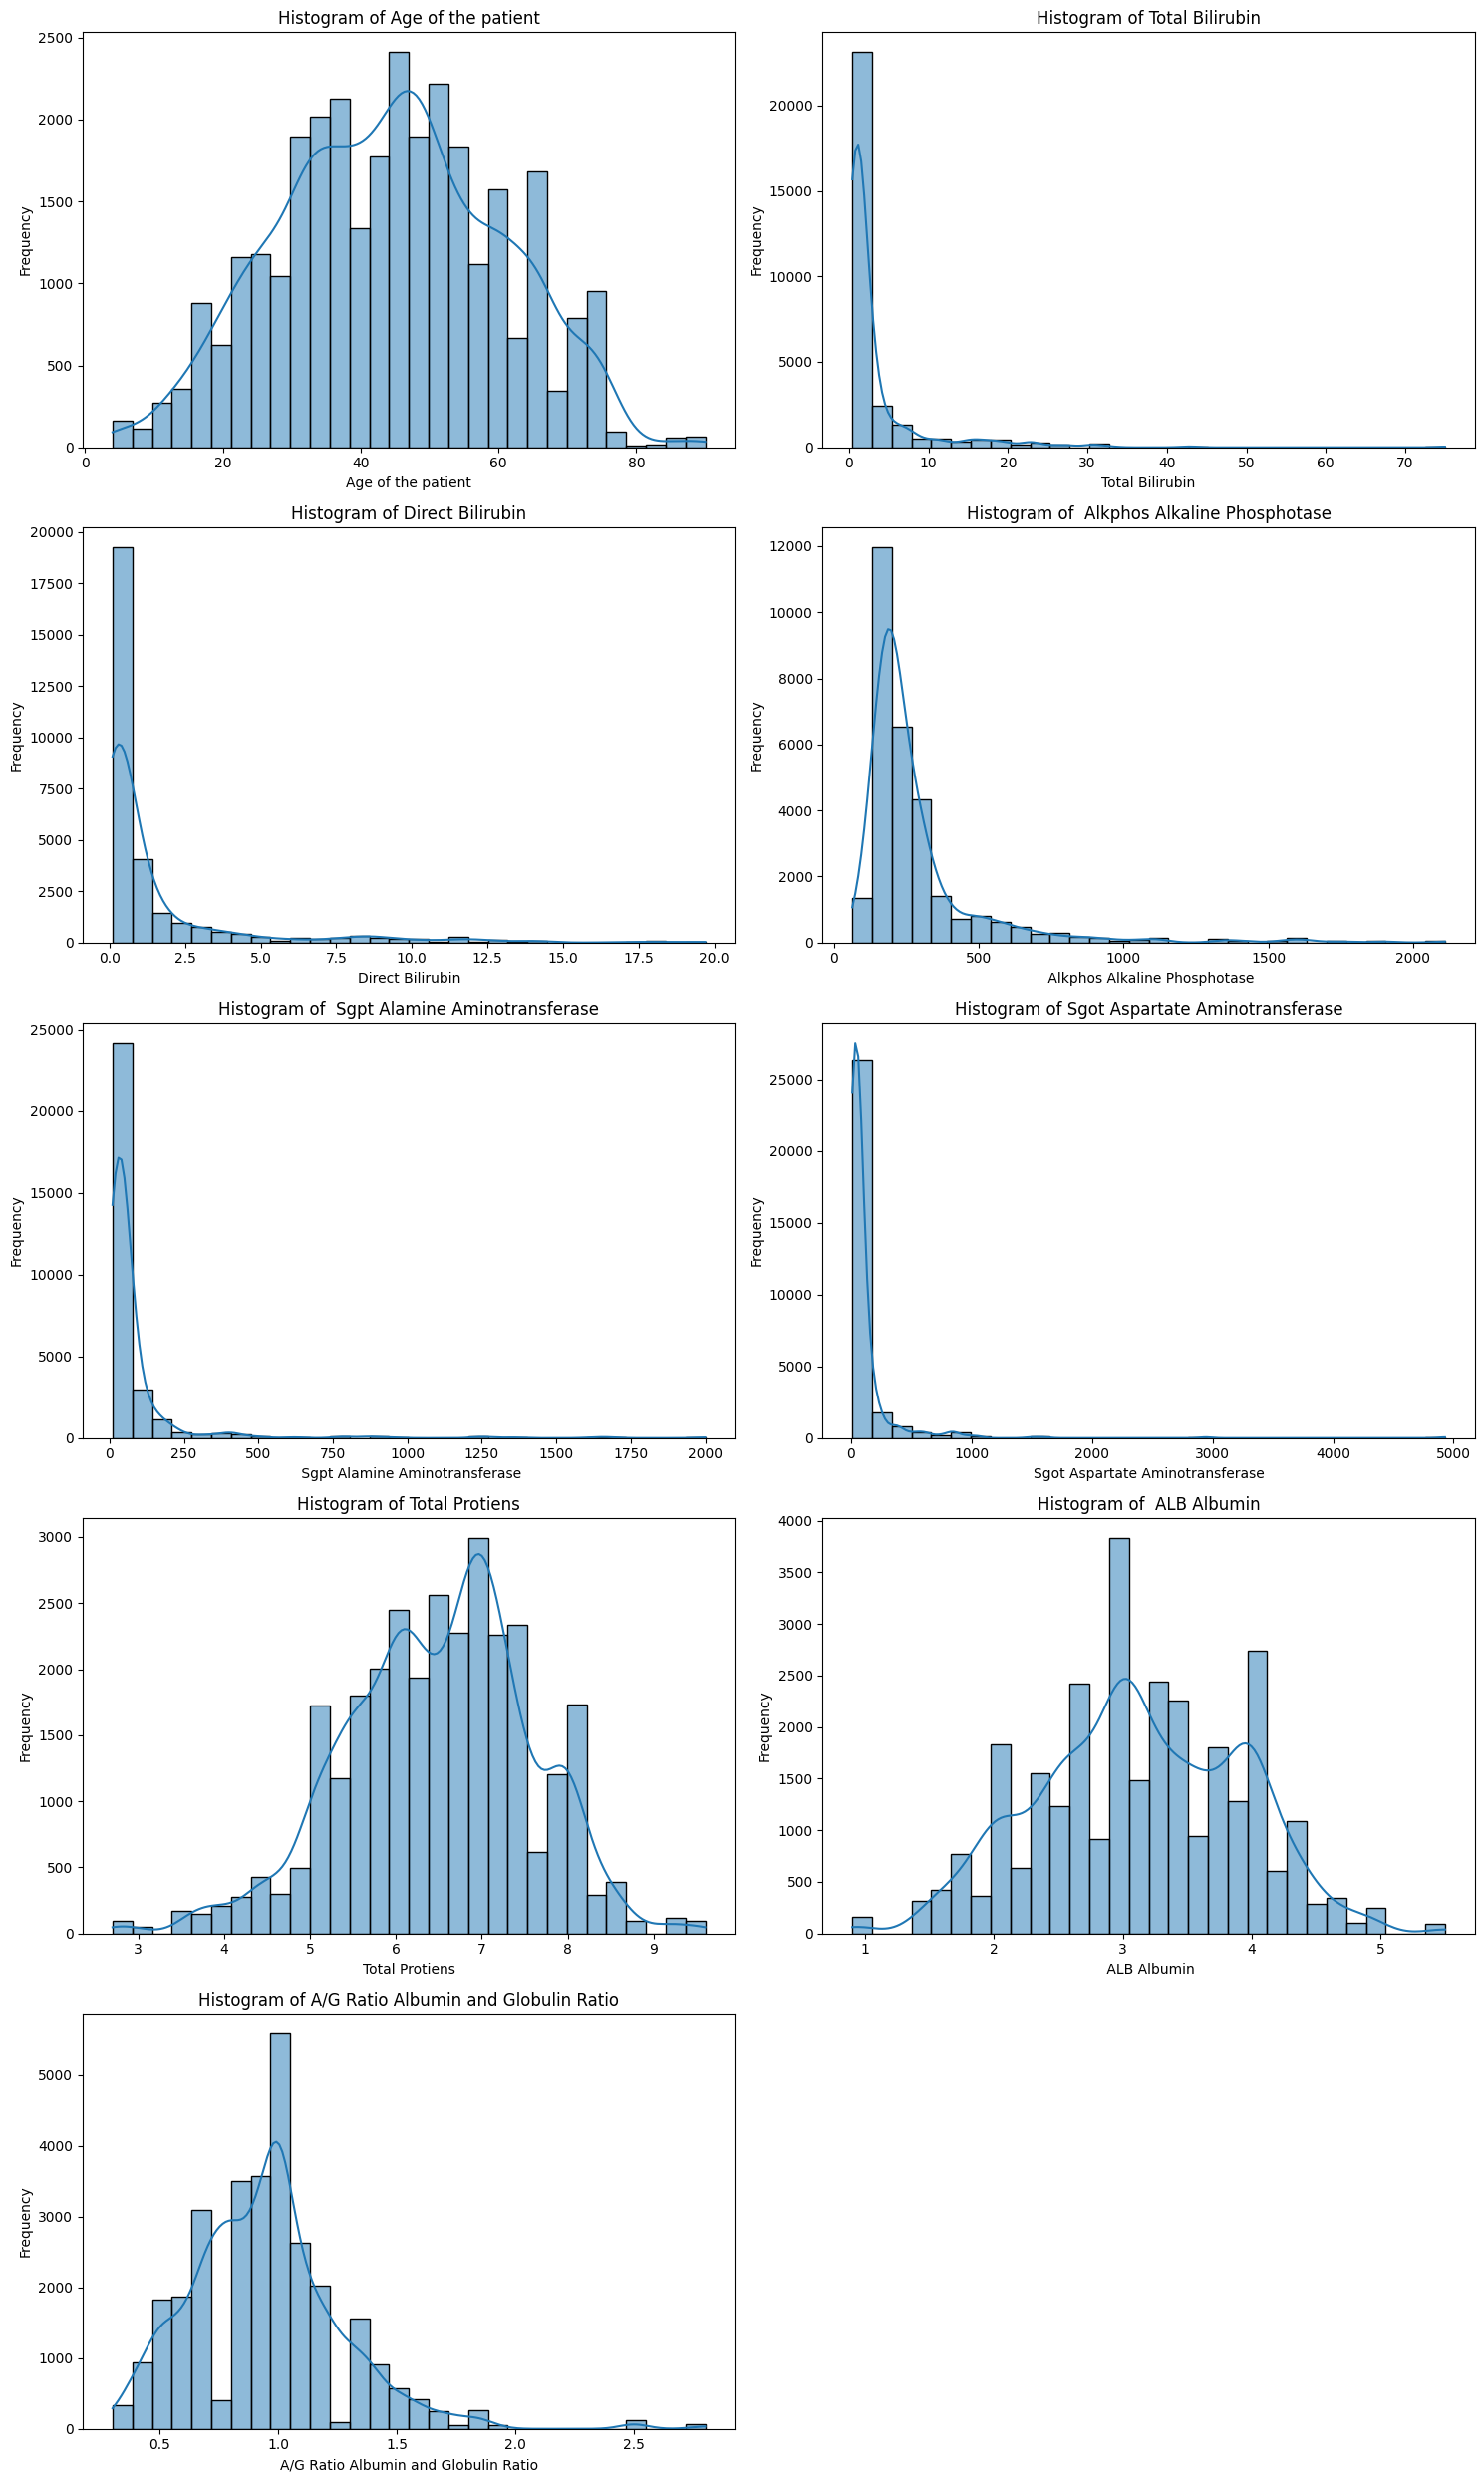

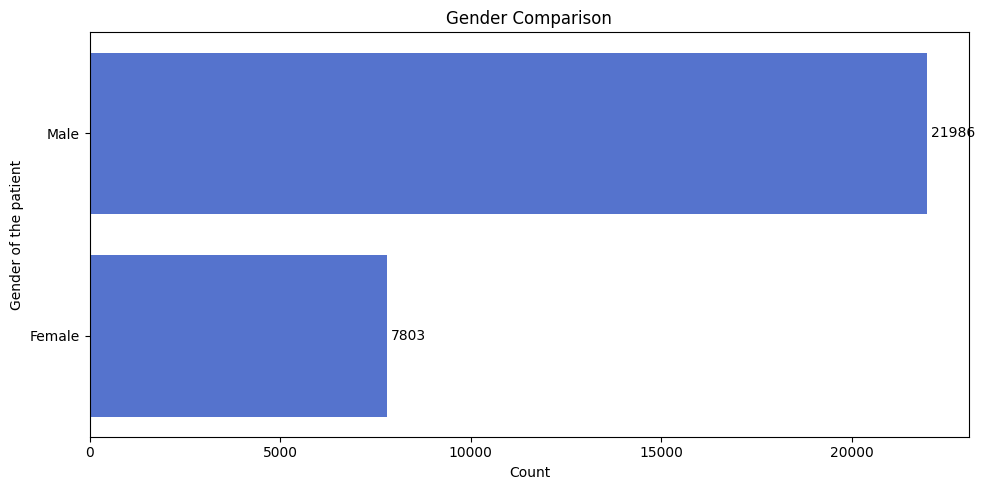

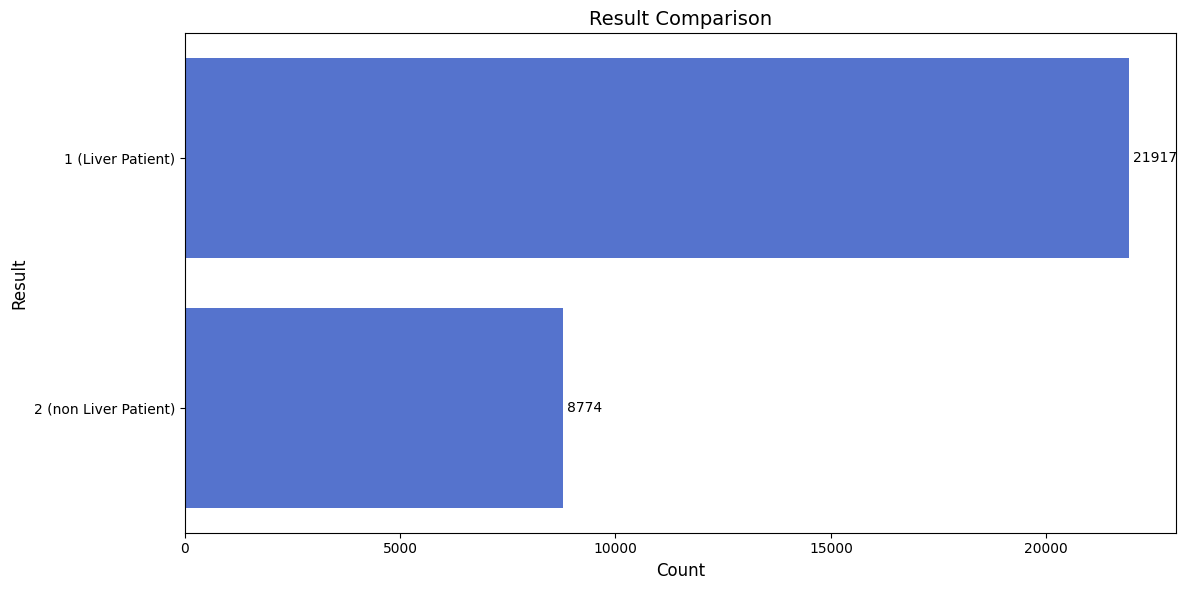

In [ ]:
# เลือกคอลัมน์ที่เป็นตัวเลข (float และ int)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# ลบคอลัมน์ Result ออกจาก num_cols เพราะจะแยกไปทำกราฟแท่ง
num_cols = [col for col in num_cols if col != 'Result']

# คำนวณจำนวนแถวและคอลัมน์สำหรับ subplot (แถวละ 2 กราฟ)
n_rows = (len(num_cols) + 1) // 2  # หารปัดขึ้น
n_cols = 2

# สร้าง subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # ทำให้เป็นอาร์เรย์ 1 มิติ

# วนลูปสร้าง histogram สำหรับแต่ละคอลัมน์ตัวเลข
for i, col in enumerate(num_cols):
    # ใช้ bw_adjust เพื่อให้เส้น KDE ไม่ขาด (ค่าต่ำทำให้เส้นเรียบขึ้น, ค่าสูงทำให้เส้นแสดงรายละเอียดมากขึ้น)
    sns.histplot(df[col], bins=30, kde=True, kde_kws={'bw_adjust': 1.5}, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

    # ปรับค่าขอบเขตของแกน x ให้ครอบคลุมข้อมูลทั้งหมด แต่ไม่กว้างเกินไป
    x_min, x_max = df[col].min(), df[col].max()
    margin = (x_max - x_min) * 0.05  # เพิ่ม margin 5%
    axes[i].set_xlim(x_min - margin, x_max + margin)

# ถ้ามีกราฟเหลือ (กรณีที่จำนวน num_cols เป็นเลขคี่) ให้ซ่อนกราฟที่เหลือ
for i in range(len(num_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# สร้างกราฟแท่งสำหรับ Gender (สลับแกน x, y)
plt.figure(figsize=(10, 5))
gender_counts = df['Gender of the patient'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

# ใช้ barplot โดยสลับแกน x, y
ax = sns.barplot(y='Gender', x='Count', data=gender_counts, color='royalblue')
plt.title('Gender Comparison')
plt.ylabel('Gender of the patient')
plt.xlabel('Count')

# เพิ่มข้อความจำนวนข้างแท่ง
for i, count in enumerate(gender_counts['Count']):
    ax.text(count + 100, i, str(count), va='center')

plt.tight_layout()
plt.show()

# สร้างกราฟแท่งสำหรับ Result พร้อมคำอธิบาย (สลับแกน x, y)
plt.figure(figsize=(12, 6))

# สร้างข้อมูลสำหรับกราฟ Result
result_counts = df['Result'].value_counts().reset_index()
result_counts.columns = ['Result', 'Count']

# สร้าง labels ที่มีทั้งตัวเลขและคำอธิบาย
result_counts['Result_Label'] = result_counts['Result'].apply(
    lambda x: f"{int(x)} ({'Liver Patient' if x == 1 else 'non Liver Patient'})"
)

# ใช้ barplot โดยสลับแกน x, y และใช้ Result_Label แทน Result
ax = sns.barplot(y='Result_Label', x='Count', data=result_counts, color='royalblue')

plt.title('Result Comparison', fontsize=14)
plt.ylabel('Result', fontsize=12)
plt.xlabel('Count', fontsize=12)

# เพิ่มจำนวนข้างแท่ง
for i, count in enumerate(result_counts['Count']):
    ax.text(count + 100, i, str(count), va='center')

plt.tight_layout()
plt.show()

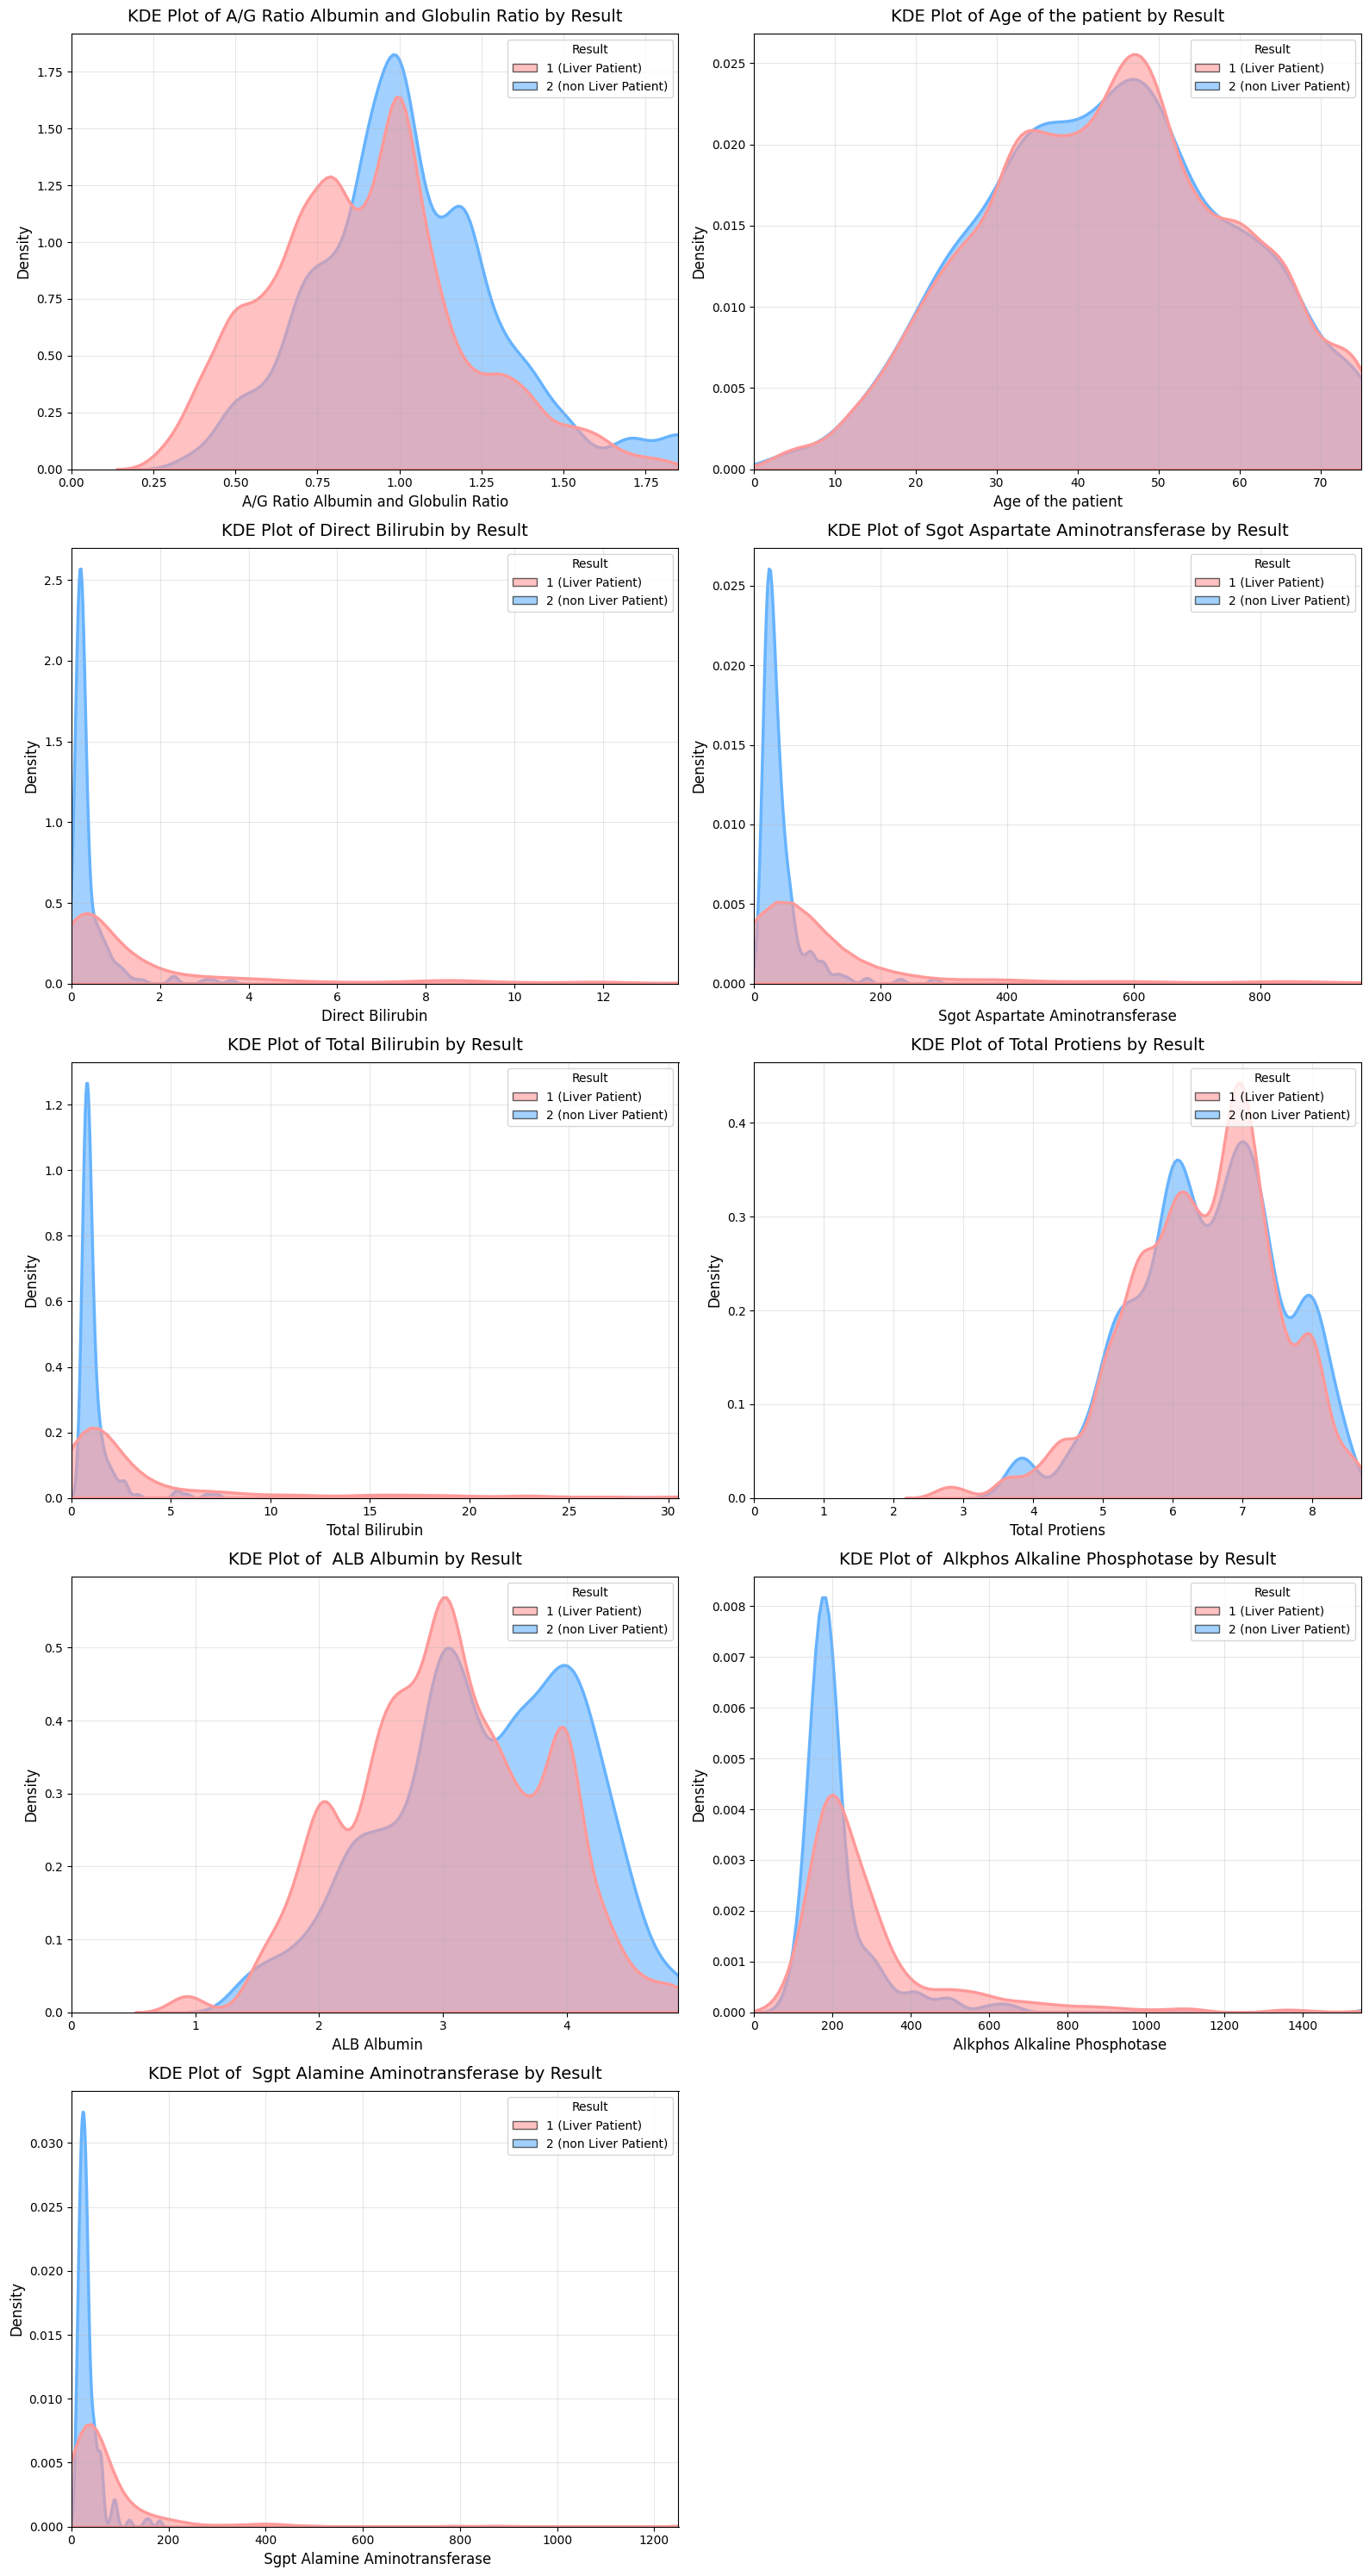

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# เพิ่มการ import Patch
from matplotlib.patches import Patch

# เลือกเฉพาะตัวแปรที่เป็นตัวเลข และไม่นับ 'result' กับ 'gender'
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(['Result', 'Gender of the patient'])

# กำหนดจำนวนแถวและคอลัมน์ (2 กราฟต่อแถว)
n_cols = 2
n_rows = (len(num_cols) + 1) // 2  # หารปัดขึ้น

# สร้าง subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows))

# ทำให้ axes เป็น array 1 มิติเพื่อง่ายต่อการวนลูป
if n_rows > 1:
    axes = axes.flatten()
elif n_cols == 1:
    axes = [axes]
else:
    # กรณีมีเพียง subplot เดียว (1 แถว 1 คอลัมน์)
    axes = [axes]

# สร้าง color palette ที่ชัดเจน พร้อมกับกำหนดความหมาย
colors = {1: '#ff9999', 2: '#66b3ff'}
labels = {1: "1 (Liver Patient)", 2: "2 (non Liver Patient)"}

# วาด KDE plot ของแต่ละตัวแปรแยกตาม 'Result'
for i, col in enumerate(num_cols):
    # ถ้ามีจำนวนกราฟน้อยกว่าจำนวน axes
    if i < len(axes):
        # สร้าง KDE plot ที่มองเห็นได้ชัดเจน
        sns.kdeplot(
            data=df,
            x=col,
            hue="Result",
            fill=True,
            common_norm=False,
            alpha=0.6,
            ax=axes[i],
            palette=colors,
            linewidth=2.5,
            bw_adjust=1.2  # ปรับความเรียบของเส้น
        )

        # ตั้งชื่อกราฟและแกน
        axes[i].set_title(f"KDE Plot of {col} by Result", fontsize=14, pad=10)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Density", fontsize=12)

        # ปรับให้กราฟอ่านง่ายขึ้น
        axes[i].grid(alpha=0.3)

        # สร้าง custom legend ที่อธิบายความหมายของสีอย่างชัดเจน
        legend_elements = [
            Patch(facecolor=colors[1], edgecolor='black', alpha=0.6, label=labels[1]),
            Patch(facecolor=colors[2], edgecolor='black', alpha=0.6, label=labels[2])
        ]

        # เพิ่ม custom legend
        axes[i].legend(
            handles=legend_elements,
            title="Result",
            fontsize=10,
            loc='upper right'
        )

        # ปรับขอบเขตของแกน x ให้ปรับสเกลอัตโนมัติโดยตัดค่า outlier ออก
        # เพื่อให้กราฟมองเห็นได้ชัดเจน
        if df[col].min() < 0:
            # กรณีมีค่าติดลบ
            x_min = df[col].min()
        else:
            # กรณีไม่มีค่าติดลบ เริ่มที่ 0
            x_min = 0

        # คำนวณเปอร์เซ็นไทล์ที่ 99 เพื่อตัด outlier
        x_max = df[col].quantile(0.99)

        # ถ้า x_max ใกล้เคียง x_min มากเกินไป ให้ขยายช่วงออก
        if (x_max - x_min) < df[col].std():
            x_max = x_min + df[col].std() * 3

        axes[i].set_xlim(x_min, x_max)

# ซ่อนแกนที่ไม่ได้ใช้
for j in range(len(num_cols), len(axes)):
    if j < len(axes):  # ป้องกันกรณีที่ axes มีเพียงตัวเดียว
        axes[j].set_visible(False)

plt.tight_layout()
plt.show()

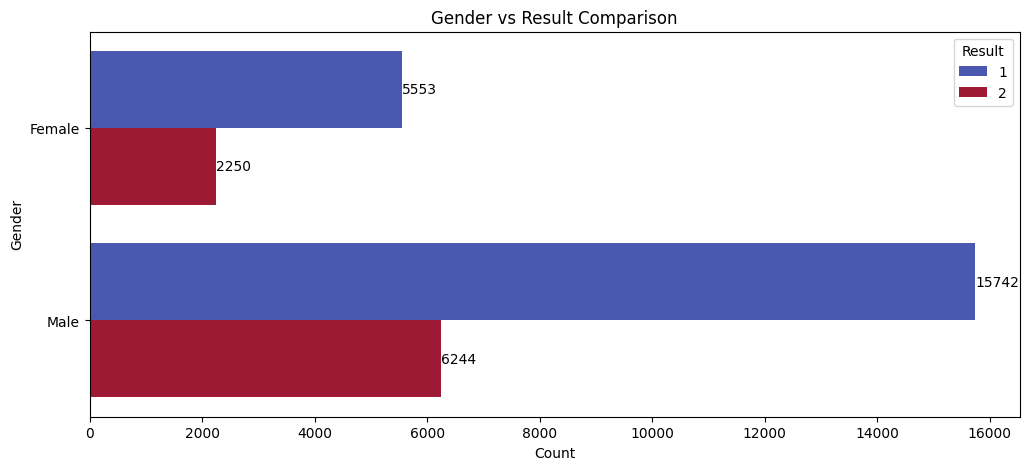

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# แปลงค่า 0 และ 1 ใน gender ให้เป็น 'Male' และ 'Female'
df['Gender of the patient'] = df['Gender of the patient'].replace({0: 'Female', 1: 'Male'})

# ตั้งค่าขนาดของกราฟ
plt.figure(figsize=(12, 5))

# พล็อตกราฟแนวนอน
sns.countplot(data=df, y="Gender of the patient", hue="Result", palette="coolwarm")

# ใส่ชื่อแกนและ Title
plt.ylabel("Gender")  # แกน Y เป็น Gender
plt.xlabel("Count")  # แกน X เป็นจำนวน
plt.title("Gender vs Result Comparison")  # ชื่อกราฟ

# แสดงค่าบนแท่งกราฟ
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt="%d")

plt.show()

In [ ]:
'''num_cols = df.select_dtypes(include=['float64', 'int64']).columns  # เลือกเฉพาะตัวแปรเชิงตัวเลข

fig, axes = plt.subplots(len(num_cols) // 3 + 1, 3, figsize=(15, 5 * (len(num_cols) // 3 + 1)))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()'''

'num_cols = df.select_dtypes(include=[\'float64\', \'int64\']).columns  # เลือกเฉพาะตัวแปรเชิงตัวเลข\n\nfig, axes = plt.subplots(len(num_cols) // 3 + 1, 3, figsize=(15, 5 * (len(num_cols) // 3 + 1)))\naxes = axes.flatten()\n\nfor i, col in enumerate(num_cols):\n    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])\n    axes[i].set_title(f"Histogram of {col}")\n    axes[i].set_xlabel(col)\n    axes[i].set_ylabel("Frequency")\n\nplt.tight_layout()\nplt.show()'

In [ ]:
# Display the original columns
print("Original columns:")
print(df.columns.tolist())

# Drop the specified columns
columns_to_drop = ['A/G Ratio Albumin and Globulin Ratio',
                   'Total Protiens']
df = df.drop(columns=columns_to_drop)

# Display the remaining columns
print("\nColumns after dropping:")
print(df.columns.tolist())

Original columns:
['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', '\xa0Alkphos Alkaline Phosphotase', '\xa0Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', '\xa0ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']

Columns after dropping:
['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', '\xa0Alkphos Alkaline Phosphotase', '\xa0Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', '\xa0ALB Albumin', 'Result']


In [ ]:
# ตรวจสอบแถวที่ซ้ำทั้งหมด
print(df.duplicated().sum())

# ตรวจสอบแถวที่ซ้ำเฉพาะในบางคอลัมน์
print(df.duplicated(subset=['Age of the patient', 'Gender of the patient']).sum())


11432
30469


In [ ]:
# ลบแถวที่ซ้ำกันทั้งหมด แต่เก็บแถวแรกไว้
df = df.drop_duplicates()
# ตรวจสอบขนาดข้อมูลใหม่
print(f"ขนาดของข้อมูลหลังลบ: {df.shape[0]} แถว")

# บันทึกข้อมูลใหม่
df.to_csv("LPD_Cleaned.csv", index=False)


ขนาดของข้อมูลหลังลบ: 19259 แถว


In [ ]:
df.shape

(19259, 9)

In [ ]:
df.isnull().sum() #Missing Value

,0
Age of the patient,1
Gender of the patient,796
Total Bilirubin,557
Direct Bilirubin,490
Alkphos Alkaline Phosphotase,694
Sgpt Alamine Aminotransferase,459
Sgot Aspartate Aminotransferase,393
ALB Albumin,413
Result,0


In [ ]:
(df.isnull().sum() / len(df)) * 100 #คำนวณเปอร์เซ็นต์ Missing Values

,0
Age of the patient,0.005192
Gender of the patient,4.133133
Total Bilirubin,2.892154
Direct Bilirubin,2.544265
Alkphos Alkaline Phosphotase,3.603510
Sgpt Alamine Aminotransferase,2.383301
Sgot Aspartate Aminotransferase,2.040604
ALB Albumin,2.144452
Result,0.000000


In [ ]:
import pandas as pd
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"เติม Missing ใน '{col}' ด้วย Median: {median_val}")

เติม Missing ใน 'Age of the patient' ด้วย Median: 45.0
เติม Missing ใน 'Total Bilirubin' ด้วย Median: 1.0
เติม Missing ใน 'Direct Bilirubin' ด้วย Median: 0.3
เติม Missing ใน ' Alkphos Alkaline Phosphotase' ด้วย Median: 208.0
เติม Missing ใน ' Sgpt Alamine Aminotransferase' ด้วย Median: 35.0
เติม Missing ใน 'Sgot Aspartate Aminotransferase' ด้วย Median: 42.0
เติม Missing ใน ' ALB Albumin' ด้วย Median: 3.1


Numeric Features เติม Median เนื่องจากค่าต่าง ๆ เช่น Bilirubin, AST, ALT, Alkaline Phosphotase เป็นตัวเลขที่อาจมีการกระจายตัวแบบเบ้ (skewed) และมี outliers

Categorical (Gender) เติมแบบ Mode เพราะเป็นข้อมูล เพศ (Gender) ซึ่งเป็นข้อมูลประเภทหมวดหมู่ (Male/Female)

In [ ]:
import pandas as pd

# Load the dataset

# Calculate the number and percentage of missing values per column
missing_count = df.isnull().sum()
missing_percent = 100 * df.isnull().mean()

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percent
})

print(missing_summary)


                                 Missing Count  Missing Percentage
Age of the patient                           0            0.000000
Gender of the patient                      796            4.133133
Total Bilirubin                              0            0.000000
Direct Bilirubin                             0            0.000000
 Alkphos Alkaline Phosphotase                0            0.000000
 Sgpt Alamine Aminotransferase               0            0.000000
Sgot Aspartate Aminotransferase              0            0.000000
 ALB Albumin                                 0            0.000000
Result                                       0            0.000000


In [ ]:
import pandas as pd
import numpy as np

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"เติม Missing ใน '{col}' ด้วย Mode: {mode_val}")


เติม Missing ใน 'Gender of the patient' ด้วย Mode: Male


In [ ]:
print(df.isnull().sum())

Age of the patient                 0
Gender of the patient              0
Total Bilirubin                    0
Direct Bilirubin                   0
 Alkphos Alkaline Phosphotase      0
 Sgpt Alamine Aminotransferase     0
Sgot Aspartate Aminotransferase    0
 ALB Albumin                       0
Result                             0
dtype: int64


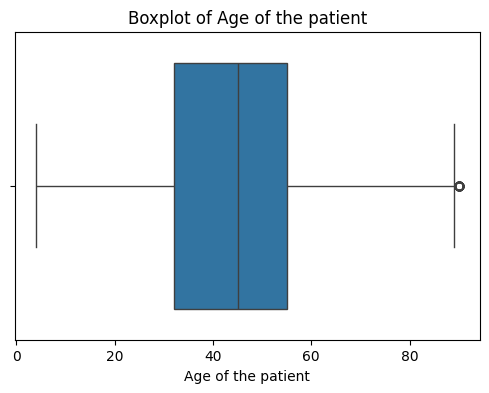

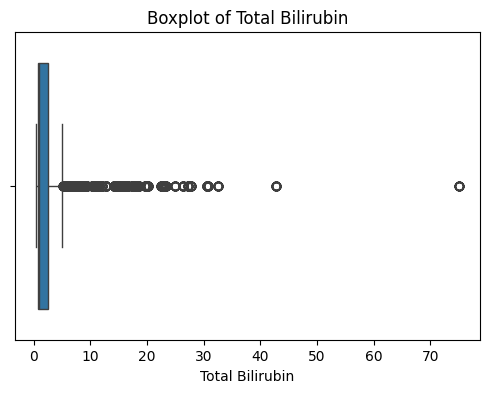

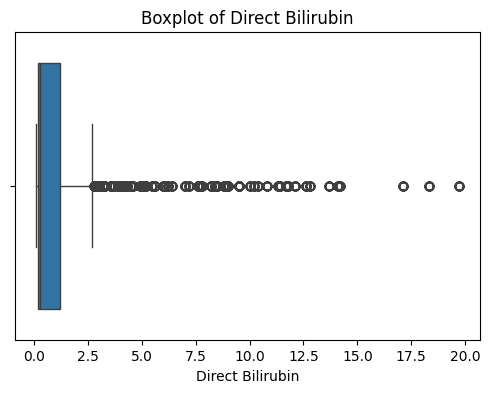

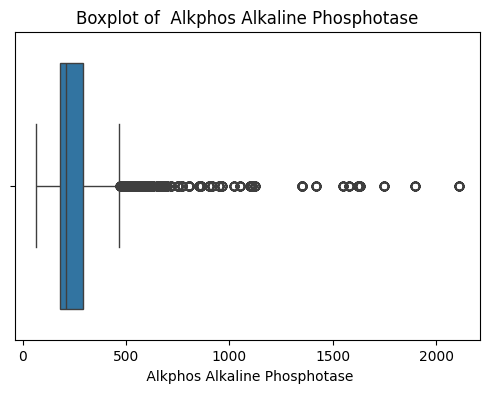

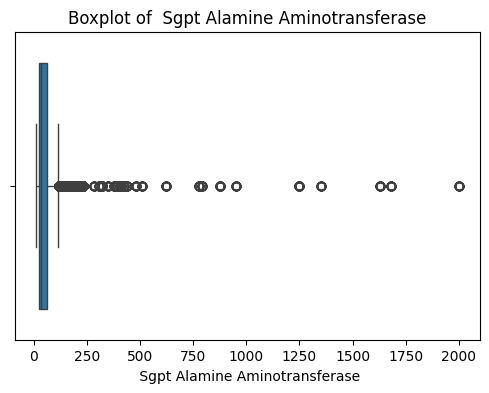

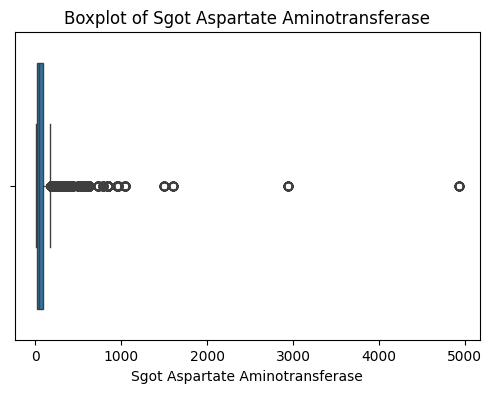

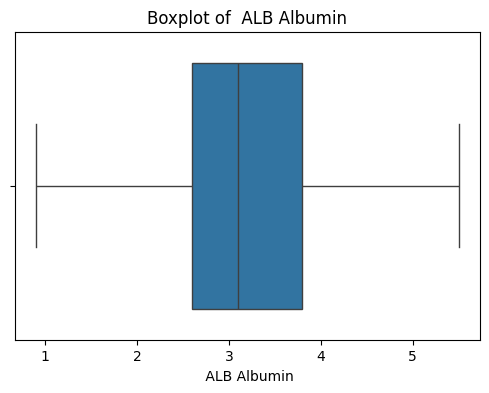

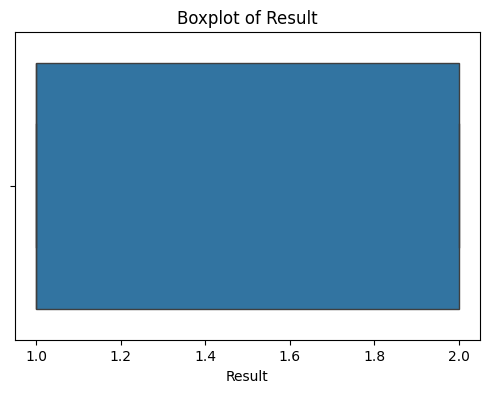

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plts

numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19259 entries, 0 to 30689
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age of the patient               19259 non-null  float64
 1   Gender of the patient            19259 non-null  object 
 2   Total Bilirubin                  19259 non-null  float64
 3   Direct Bilirubin                 19259 non-null  float64
 4    Alkphos Alkaline Phosphotase    19259 non-null  float64
 5    Sgpt Alamine Aminotransferase   19259 non-null  float64
 6   Sgot Aspartate Aminotransferase  19259 non-null  float64
 7    ALB Albumin                     19259 non-null  float64
 8   Result                           19259 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Get only the numeric columns (skip non-numeric columns like Gender)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Display how many rows in the original DataFrame
print(f"Original DataFrame shape: {df.shape}")

# Remove outliers from each numeric column sequentially
for column in numeric_columns:
    # Skip the Result column if it's a target variable you want to keep intact
    if column == 'Result':
        continue

    original_size = df.shape[0]
    df = remove_outliers_iqr(df, column)
    removed = original_size - df.shape[0]

    print(f"Removed {removed} outliers from {column}. Remaining rows: {df.shape[0]}")

# Display final DataFrame shape
print(f"Final DataFrame shape after outlier removal: {df.shape}")

Original DataFrame shape: (19259, 9)
Removed 51 outliers from Age of the patient. Remaining rows: 19208
Removed 2787 outliers from Total Bilirubin. Remaining rows: 16421
Removed 1424 outliers from Direct Bilirubin. Remaining rows: 14997
Removed 1536 outliers from  Alkphos Alkaline Phosphotase. Remaining rows: 13461
Removed 1331 outliers from  Sgpt Alamine Aminotransferase. Remaining rows: 12130
Removed 1010 outliers from Sgot Aspartate Aminotransferase. Remaining rows: 11120
Removed 95 outliers from  ALB Albumin. Remaining rows: 11025
Final DataFrame shape after outlier removal: (11025, 9)


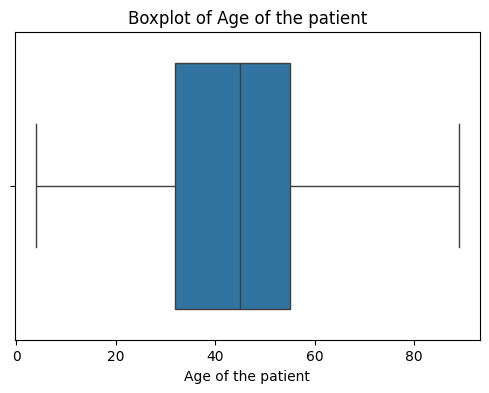

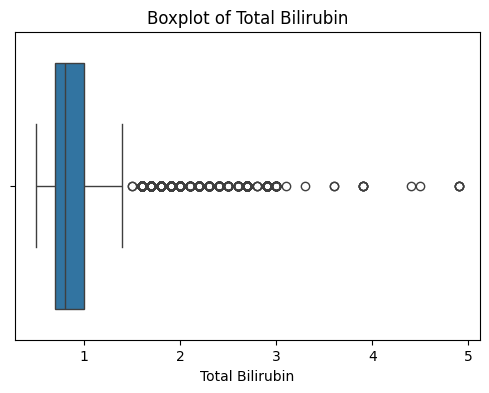

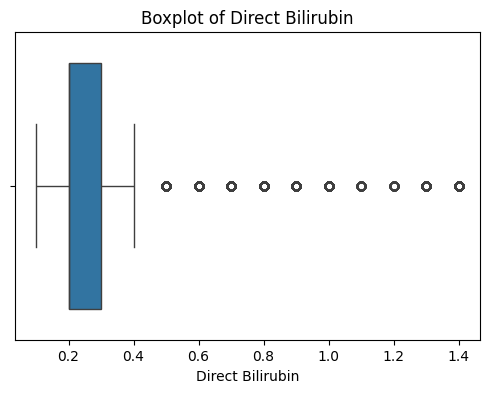

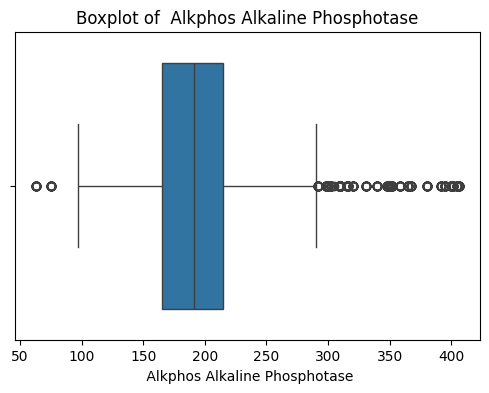

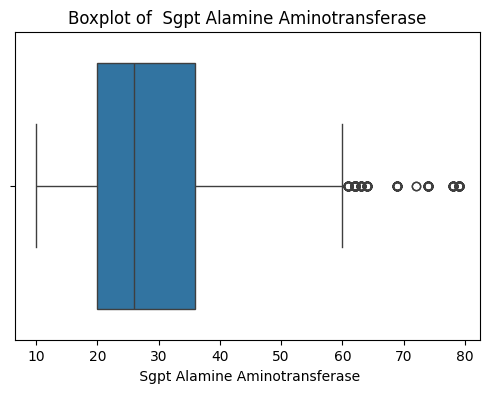

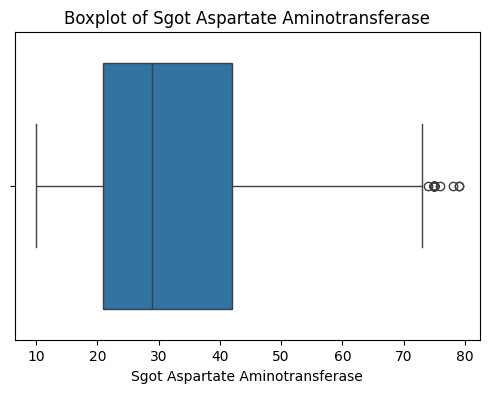

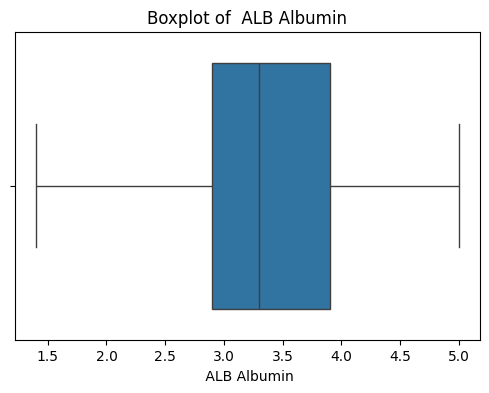

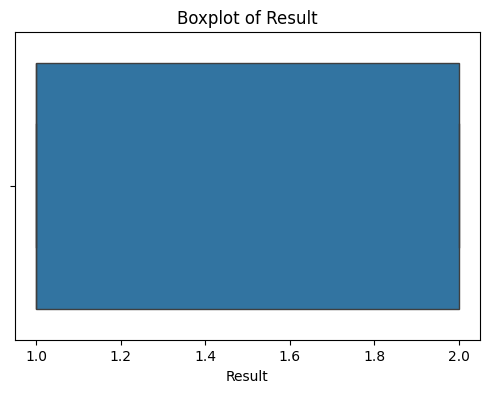

(11025, 9)

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()
df.shape

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.5/393.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 83.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6b4818f4458b56ad5474ffe7a594a6e2a10479bcc78674804272fc949235d115
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="LiverPatient_DSPJ", explorative=True)
# บันทึกรํายงํานเป็นไฟล์ HTML
profile.to_file("data_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=["Result"])
y = df["Result"]


In [ ]:
# ดูตัวอย่างข้อมูลจริงก่อนแปลง
print(df["Gender of the patient"].head(10))

# ทดลองแปลงใหม่ให้ชัดเจน
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender of the patient"] = le.fit_transform(df["Gender of the patient"])

# ตรวจสอบหลังแปลง
print(df["Gender of the patient"].head(10))

0     0
3     1
5     1
6     0
7     0
8     1
9     1
10    1
11    1
12    1
Name: Gender of the patient, dtype: int64
0     0
3     1
5     1
6     0
7     0
8     1
9     1
10    1
11    1
12    1
Name: Gender of the patient, dtype: int64


In [ ]:
df.dtypes

,0
Age of the patient,float64
Gender of the patient,int64
Total Bilirubin,float64
Direct Bilirubin,float64
Alkphos Alkaline Phosphotase,float64
Sgpt Alamine Aminotransferase,float64
Sgot Aspartate Aminotransferase,float64
ALB Albumin,float64
Result,int64


In [ ]:
print(df["Gender of the patient"].unique())

[0 1]


In [ ]:
# แบ่งข้อมูลเป็น 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}, Test Data: {X_test.shape}")

Training Data: (8820, 8), Test Data: (2205, 8)


In [ ]:
print("Training set (X_train):", X_train.shape)
print("Test set (X_test):", X_test.shape)
print("Training labels (y_train):", y_train.shape)
print("Test labels (y_test):", y_test.shape)

Training set (X_train): (8820, 8)
Test set (X_test): (2205, 8)
Training labels (y_train): (8820,)
Test labels (y_test): (2205,)


In [ ]:
print(y_train.value_counts())

Result
1    5204
2    3616
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11025 entries, 0 to 30689
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age of the patient               11025 non-null  float64
 1   Gender of the patient            11025 non-null  int64  
 2   Total Bilirubin                  11025 non-null  float64
 3   Direct Bilirubin                 11025 non-null  float64
 4    Alkphos Alkaline Phosphotase    11025 non-null  float64
 5    Sgpt Alamine Aminotransferase   11025 non-null  float64
 6   Sgot Aspartate Aminotransferase  11025 non-null  float64
 7    ALB Albumin                     11025 non-null  float64
 8   Result                           11025 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 861.3 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# เลือกคอลัมน์ตัวเลขทั้งหมดยกเว้น Gender of the patient และ Result
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
columns_to_scale = [col for col in numeric_columns if col != 'Gender of the patient' and col != 'Result']

print(f"Columns selected for scaling: {columns_to_scale}")

# แยกข้อมูลเป็น features และ target
X = df.drop('Result', axis=1) if 'Result' in df.columns else df.copy()
y = df['Result'] if 'Result' in df.columns else None

# สร้าง DataFrame ใหม่สำหรับเก็บข้อมูลที่ standardize แล้ว
X_processed = X.copy()

# ใช้ StandardScaler เฉพาะกับคอลัมน์ที่ต้องการ
scaler = StandardScaler()
X_processed[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

print(f"Original data first few rows:\n{X.head()}")
print(f"\nScaled data first few rows:\n{X_processed.head()}")
print(f"\nScaled data shape: {X_processed.shape}")
print("Scaling completed successfully")

# ตรวจสอบว่า Gender ไม่ได้ถูก scale จริงๆ
if 'Gender of the patient' in X.columns:
    original_gender_values = X['Gender of the patient'].unique()
    scaled_gender_values = X_processed['Gender of the patient'].unique()

    print(f"\nOriginal unique Gender values: {original_gender_values}")
    print(f"Scaled unique Gender values: {scaled_gender_values}")

    if np.array_equal(original_gender_values, scaled_gender_values):
        print("✓ Confirmation: Gender values were NOT scaled")
    else:
        print("✗ Warning: Gender values were changed during processing")

Columns selected for scaling: ['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin', '\xa0Alkphos Alkaline Phosphotase', '\xa0Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', '\xa0ALB Albumin']
Original data first few rows:
   Age of the patient  Gender of the patient  Total Bilirubin  \
0                65.0                      0              0.7   
3                58.0                      1              1.0   
5                46.0                      1              1.8   
6                26.0                      0              0.9   
7                29.0                      0              0.9   

   Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0               0.1                          187.0   
3               0.4                          182.0   
5               0.7                          208.0   
6               0.2                          154.0   
7               0.3                          202.0   

    Sgpt Alamine Aminotransferase  

In [ ]:
# LinearSVC
# 2. เลือกโมเดล(Choose Model)
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
model = LinearSVC(random_state=42)
# 3. ฝึกโมเดล (Train Model)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# 4. ทํานายผลลัพธ์ (Make Predictions)
from sklearn.metrics import accuracy_score
# 5. ประเมินผล (Evaluate Model)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5882086167800453
[[1035  270]
 [ 638  262]]
0.6186491332934848
0.7931034482758621
0.6950973807924782


In [ ]:
# KNeighborsClassifier

# 2. เลือกโมเดล (Choose Model)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

# 3. ฝึกโมเดล (Train Model)
model.fit(X_train, y_train)

# 4.ทํานายผลลัพธ์ (Make Predictions)
y_pred = model.predict(X_test)

# 5.ประเมินผล (Evaluate Model)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9043083900226757
[[1200  105]
 [ 106  794]]
0.9188361408882083
0.9195402298850575
0.9191880505553428


In [ ]:
# SVC
# 2.เลือกโมเดล (Choose Model)
from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state=42)
# 3. ฝึกโมเดล (Train Model)
model.fit(X_train, y_train)
# 4. ทํานายผลลัพธ์ (Make Predictions)
y_pred = model.predict(X_test)
# 5. ประเมินผล (Evaluate Model)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5918367346938775
[[1305    0]
 [ 900    0]]
0.5918367346938775
1.0
0.7435897435897436


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,
random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9927437641723356
[[1296    9]
 [   7  893]]
0.9946277820414429
0.993103448275862
0.9938650306748467


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100,
learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9183673469387755
[[1248   57]
 [ 123  777]]
0.9102844638949672
0.9563218390804598
0.9327354260089686


In [ ]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(n_estimators=100,
random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9904761904761905
[[1296    9]
 [  12  888]]
0.9908256880733946
0.993103448275862
0.9919632606199771


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100,
random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.6526077097505669
[[1093  212]
 [ 554  346]]
0.6636308439587129
0.8375478927203065
0.7405149051490515


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100,
random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9931972789115646
[[1297    8]
 [   7  893]]
0.9946319018404908
0.9938697318007663
0.9942506707550786


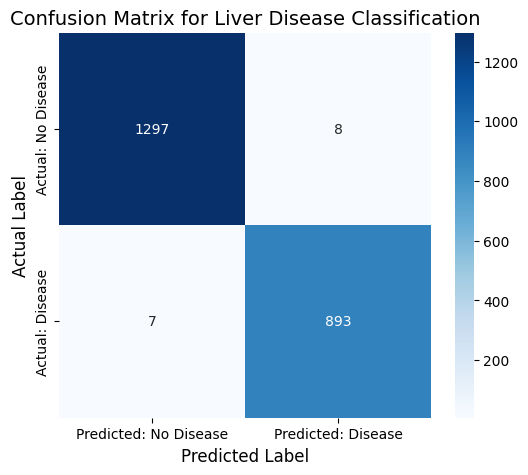

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# กำหนด Confusion Matrix
# โดยสมมติให้ตำแหน่ง [0,0] = TN, [0,1] = FP, [1,0] = FN, [1,1] = TP
# ดังนั้นค่าจะเป็น [[TN, FP],
#                    [FN, TP]]
cm = np.array([[1297, 8],
               [   7, 893]])

plt.figure(figsize=(6,5))

# สร้าง Heatmap ด้วย Seaborn
sns.heatmap(
    cm,
    annot=True,       # แสดงตัวเลขในแต่ละช่อง
    fmt="d",          # แสดงตัวเลขเป็นจำนวนเต็ม
    cmap="Blues",     # โทนสีฟ้า
    cbar=True,        # แสดง color bar
    xticklabels=["Predicted: No Disease", "Predicted: Disease"],
    yticklabels=["Actual: No Disease", "Actual: Disease"]
)

plt.title("Confusion Matrix for Liver Disease Classification", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)

# ปรับขอบเขตแกน Y ไม่ให้ label ถูกครอบ (โดยค่าเริ่มต้นอาจกลับด้าน)
plt.ylim([2, 0])  # หรือใช้ plt.gca().invert_yaxis()

plt.show()


In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# สร้างโมเดล ExtraTreesClassifier ที่คุณใช้และได้ผลดี
model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# กำหนด 5-Fold Cross-Validation แบบ Stratified เพื่อรักษาสัดส่วน class
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# เตรียมตัวแปรสำหรับเก็บผลลัพธ์
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# ทำ k-fold cross-validation ด้วยตัวเอง เพื่อเก็บ confusion matrix
fold = 1
for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # ฝึกโมเดลกับข้อมูล training fold
    model.fit(X_train_fold, y_train_fold)

    # ทำนายผลลัพธ์
    y_pred_fold = model.predict(X_test_fold)

    # คำนวณ metrics
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    precision = precision_score(y_test_fold, y_pred_fold)
    recall = recall_score(y_test_fold, y_pred_fold)
    f1 = f1_score(y_test_fold, y_pred_fold)
    conf_matrix = confusion_matrix(y_test_fold, y_pred_fold)

    # เก็บผลลัพธ์
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(conf_matrix)

    fold += 1

# แปลงลิสต์เป็น numpy array
accuracy_scores = np.array(accuracy_scores)
precision_scores = np.array(precision_scores)
recall_scores = np.array(recall_scores)
f1_scores = np.array(f1_scores)

# แสดงผลลัพธ์รวมทั้งหมด
print("Cross-Validation Results (6 ทศนิยม):")
print(f"Accuracy: {accuracy_scores.mean():.6f} (±{accuracy_scores.std():.6f})")
print(f"Precision: {precision_scores.mean():.6f} (±{precision_scores.std():.6f})")
print(f"Recall: {recall_scores.mean():.6f} (±{recall_scores.std():.6f})")
print(f"F1 Score: {f1_scores.mean():.6f} (±{f1_scores.std():.6f})")

# แสดงผลลัพธ์แต่ละ fold
print("\nResults for each fold (6 ทศนิยม):")
for i in range(5):
    print(f"Fold {i+1}:")
    print(f"  Accuracy: {accuracy_scores[i]:.6f}")
    print(f"  Precision: {precision_scores[i]:.6f}")
    print(f"  Recall: {recall_scores[i]:.6f}")
    print(f"  F1 Score: {f1_scores[i]:.6f}")
    print(f"  Confusion Matrix:")
    print(f"    {confusion_matrices[i][0]}")
    print(f"    {confusion_matrices[i][1]}")

Cross-Validation Results (6 ทศนิยม):
Accuracy: 0.992290 (±0.002365)
Precision: 0.990986 (±0.002686)
Recall: 0.996006 (±0.001778)
F1 Score: 0.993488 (±0.001993)

Results for each fold (6 ทศนิยม):
Fold 1:
  Accuracy: 0.989116
  Precision: 0.986301
  Recall: 0.995392
  F1 Score: 0.990826
  Confusion Matrix:
    [1296    6]
    [ 18 885]
Fold 2:
  Accuracy: 0.990023
  Precision: 0.990046
  Recall: 0.993088
  F1 Score: 0.991564
  Confusion Matrix:
    [1293    9]
    [ 13 890]
Fold 3:
  Accuracy: 0.992744
  Precision: 0.991590
  Recall: 0.996160
  F1 Score: 0.993870
  Confusion Matrix:
    [1297    5]
    [ 11 892]
Fold 4:
  Accuracy: 0.995011
  Precision: 0.993125
  Recall: 0.998464
  F1 Score: 0.995787
  Confusion Matrix:
    [1300    2]
    [  9 894]
Fold 5:
  Accuracy: 0.994558
  Precision: 0.993870
  Recall: 0.996925
  F1 Score: 0.995395
  Confusion Matrix:
    [1297    4]
    [  8 896]


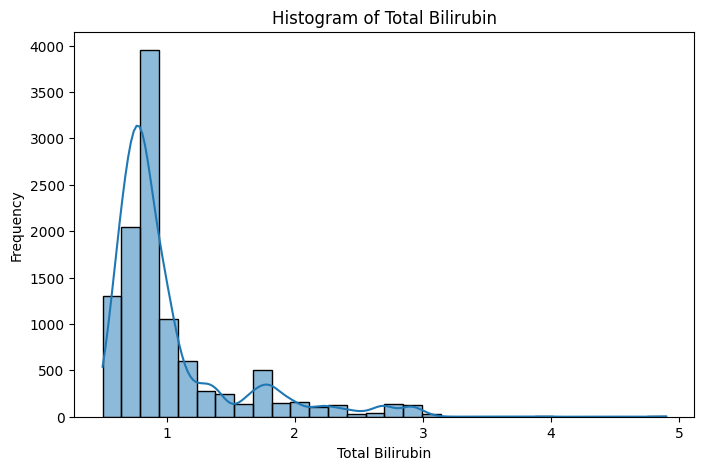

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Total Bilirubin'], bins=30, kde=True)
plt.title("Histogram of Total Bilirubin")
plt.xlabel("Total Bilirubin")
plt.ylabel("Frequency")
plt.show()


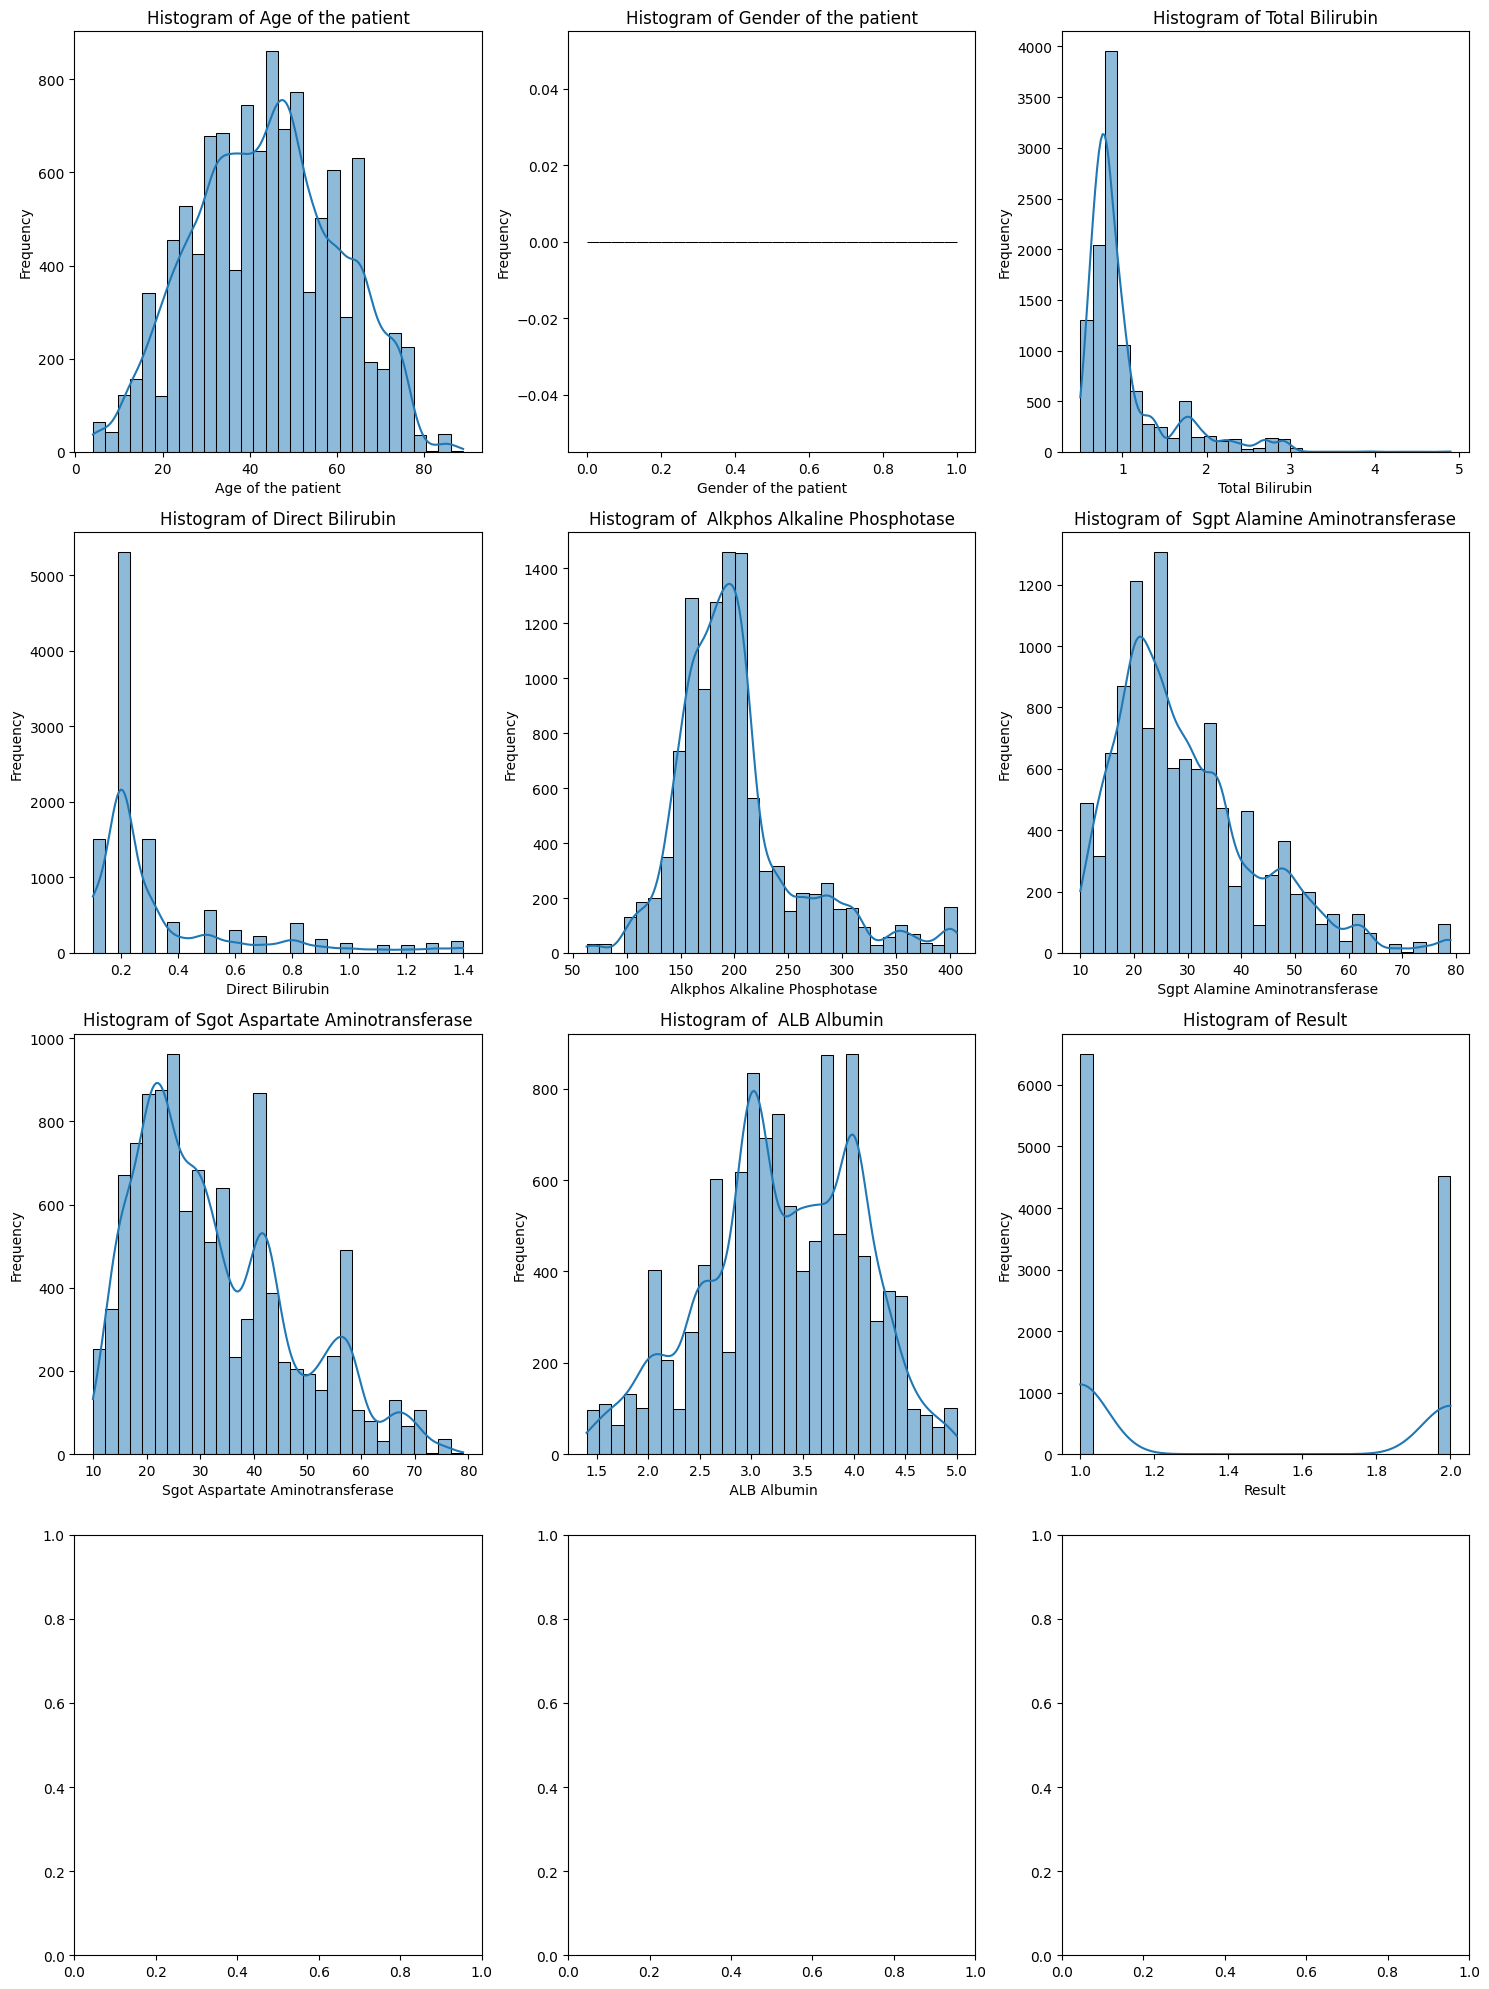

In [ ]:
# **1. Histogram & KDE Plot สำหรับทุกตัวแปร**
num_cols = df.select_dtypes(include=['float64', 'int64']).columns  # เลือกเฉพาะตัวแปรเชิงตัวเลข

fig, axes = plt.subplots(len(num_cols) // 3 + 1, 3, figsize=(15, 5 * (len(num_cols) // 3 + 1)))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

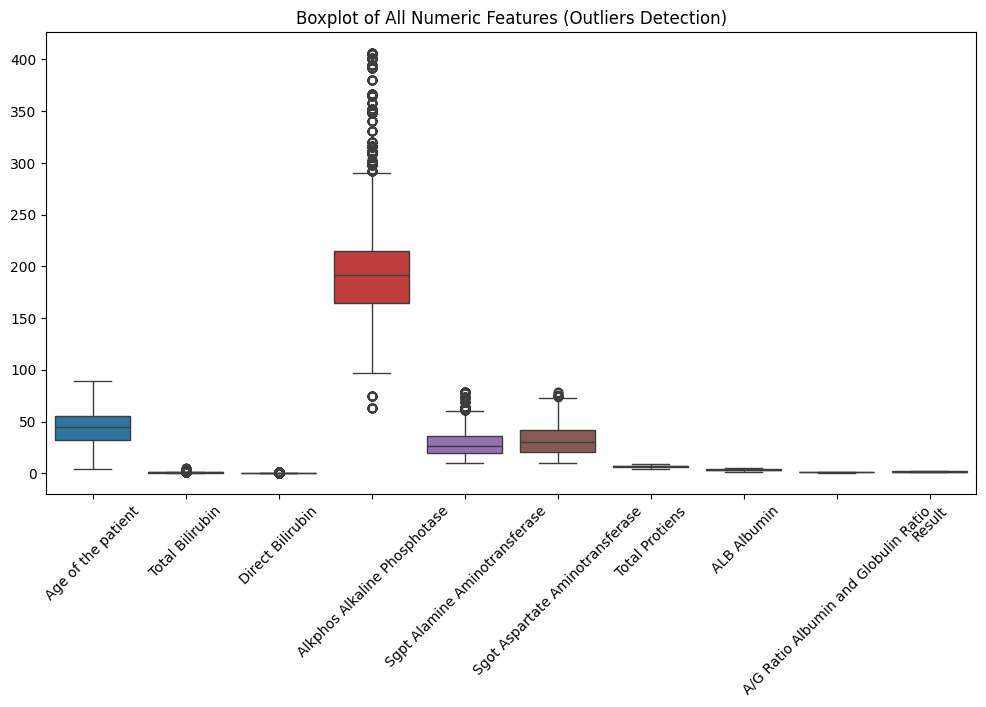

In [ ]:
# **2. Boxplot เพื่อตรวจสอบ Outliers สำหรับทุกตัวแปร**
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot of All Numeric Features (Outliers Detection)")
plt.xticks(rotation=45)
plt.show()

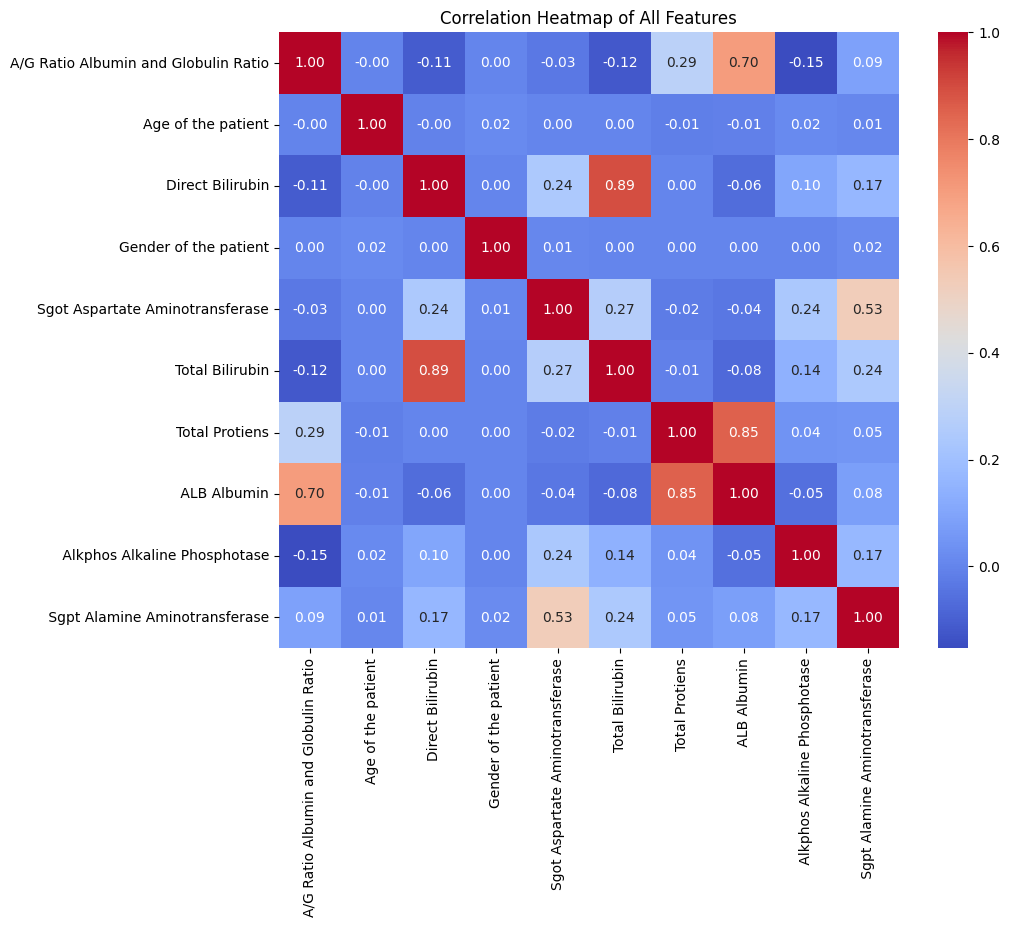

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# เลือกเฉพาะตัวแปรตัวเลขและไม่นับรวม 'result'
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(['Result'])

plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of All Features")
plt.show()


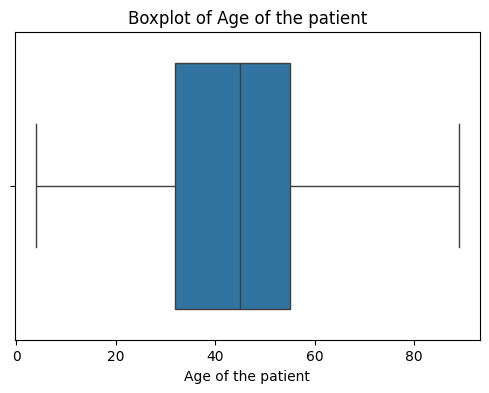

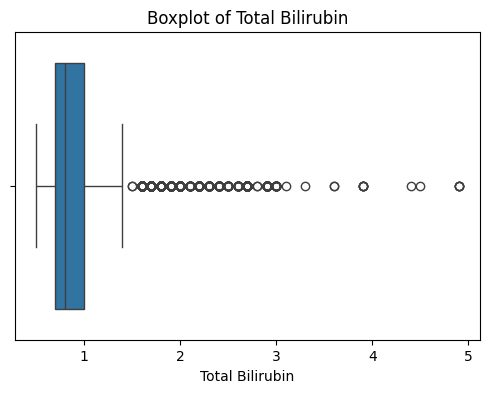

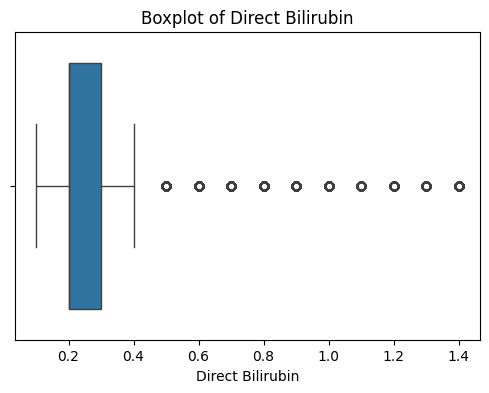

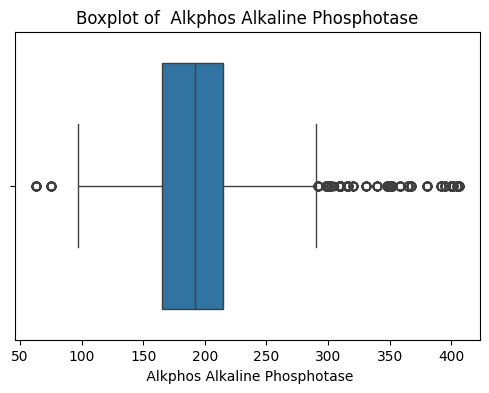

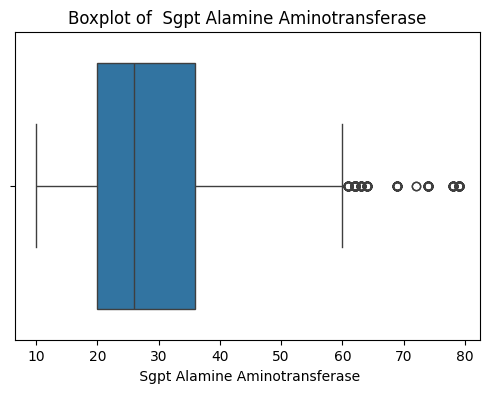

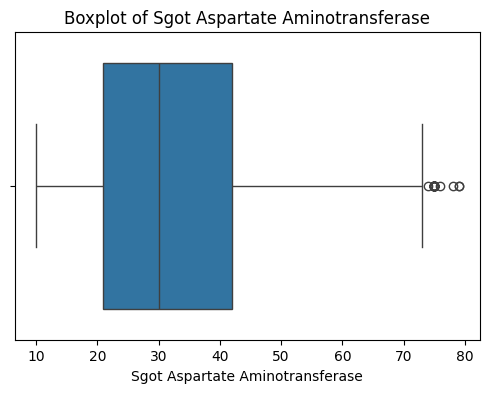

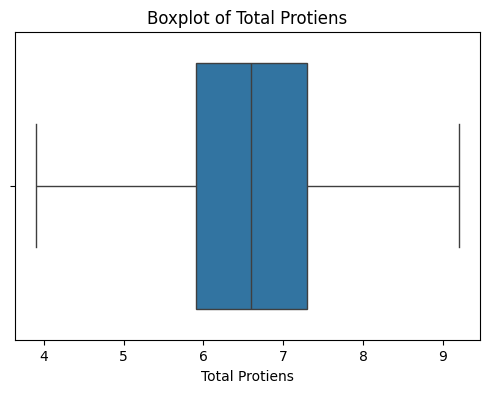

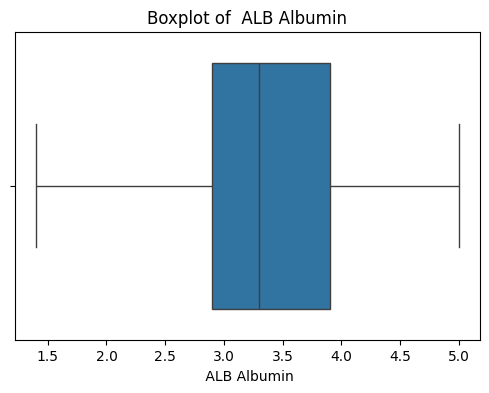

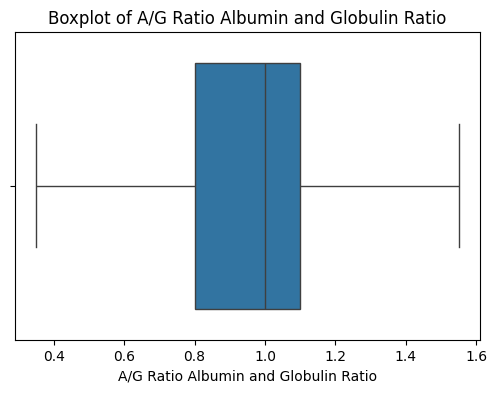

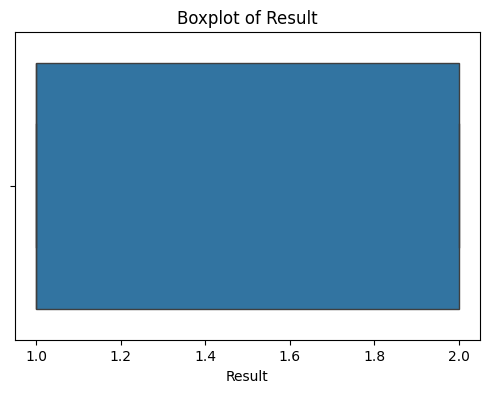

(10597, 11)

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()
df.shape

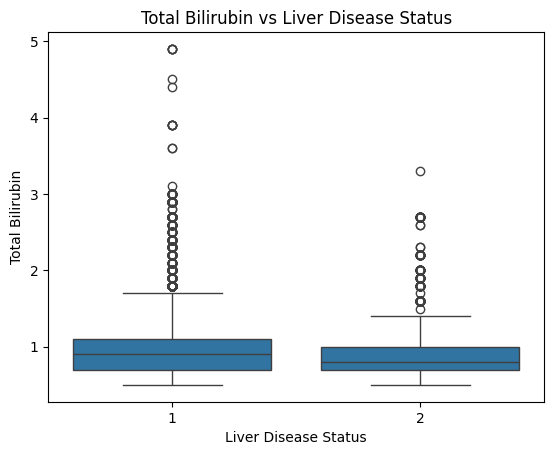

In [ ]:
sns.boxplot(x="Result", y="Total Bilirubin", data=df)
plt.title("Total Bilirubin vs Liver Disease Status")
plt.xlabel("Liver Disease Status")
plt.ylabel("Total Bilirubin")
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Sgpt_Alamine_Aminotransferase"], y=df["Sgot_Aspartate_Aminotransferase"], hue=df["Result"], alpha=0.6)
plt.title("Scatter Plot of Sgpt vs Sgot by Liver Disease Status")
plt.xlabel("Sgpt (ALT)")
plt.ylabel("Sgot (AST)")
plt.legend(["Healthy", "Liver Disease"])
plt.show()


KeyError: 'Sgpt_Alamine_Aminotransferase'

<Figure size 1000x600 with 0 Axes>

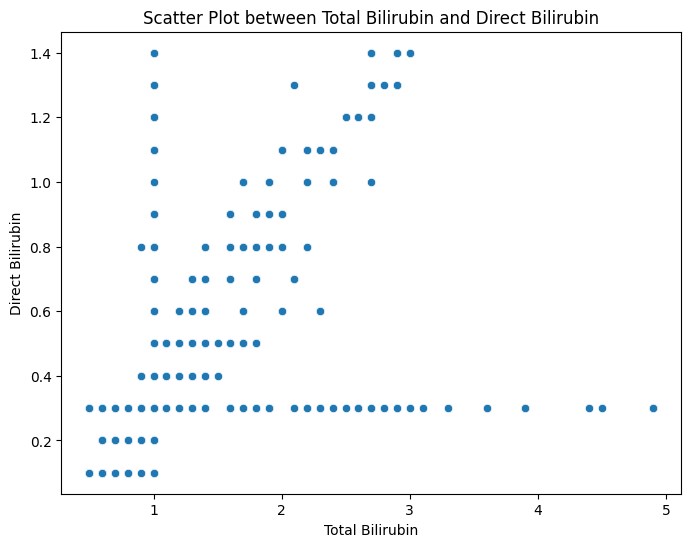

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Total Bilirubin"], y=df["Direct Bilirubin"])
plt.title("Scatter Plot between Total Bilirubin and Direct Bilirubin")
plt.xlabel("Total Bilirubin")
plt.ylabel("Direct Bilirubin")
plt.show()


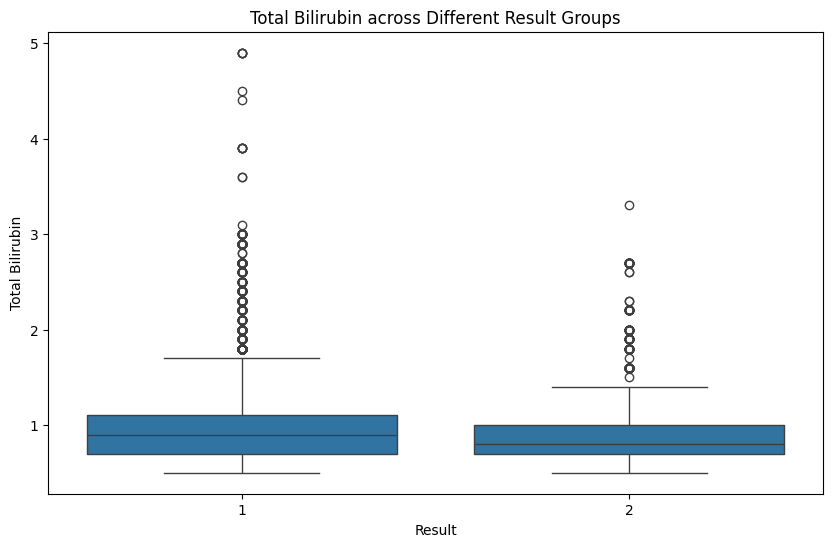

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Result"], y=df["Total Bilirubin"])
plt.title("Total Bilirubin across Different Result Groups")
plt.show()


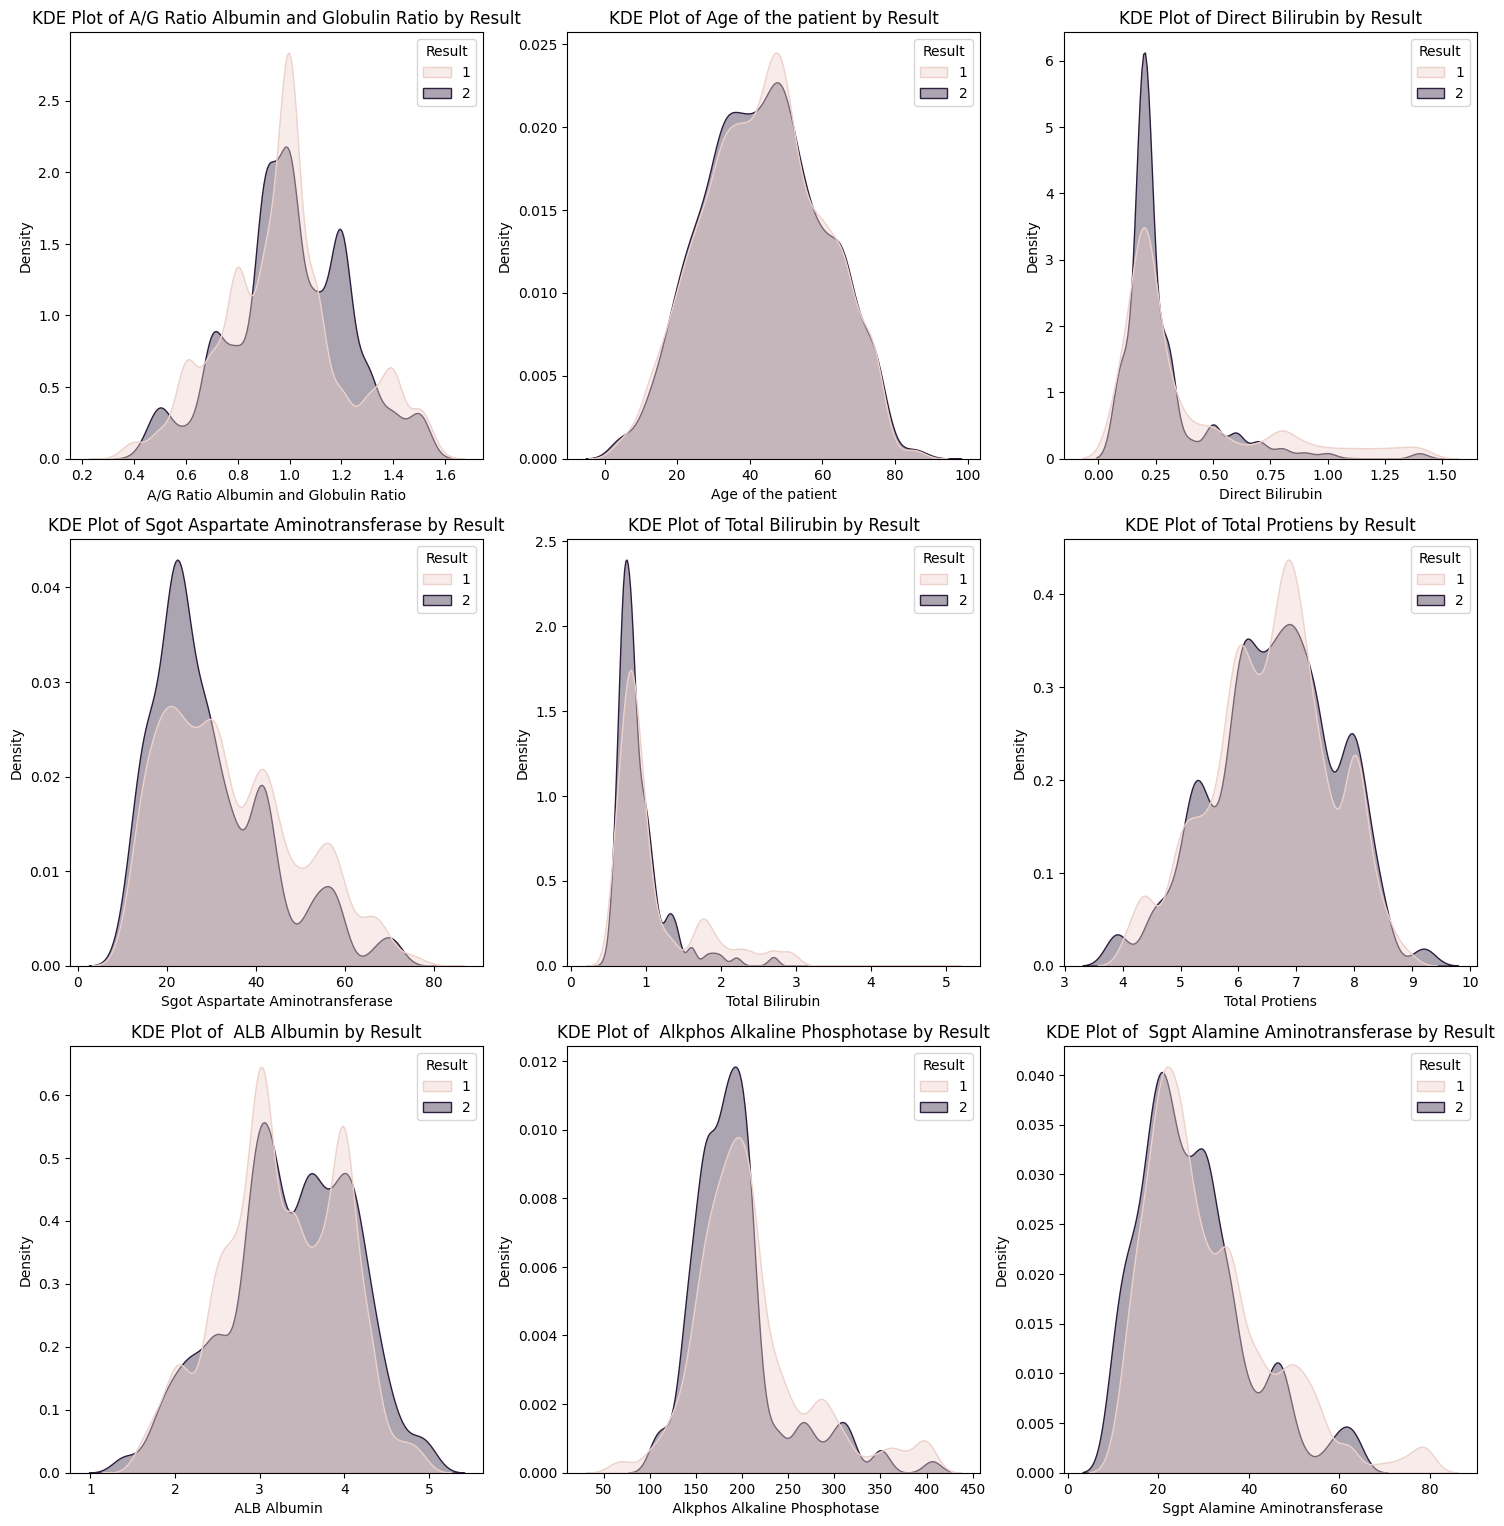

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# เลือกเฉพาะตัวแปรที่เป็นตัวเลข และไม่นับ 'result' กับ 'gender'
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(['Result', 'Gender of the patient'])

# ตั้งค่าขนาดของกราฟ
fig, axes = plt.subplots(len(num_cols) // 3 + 1, 3, figsize=(15, 5 * (len(num_cols) // 3 + 1)))
axes = axes.flatten()

# วาด KDE plot ของแต่ละตัวแปรแยกตาม 'result'
for i, col in enumerate(num_cols):
    sns.kdeplot(data=df, x=col, hue="Result", fill=True, common_norm=False, alpha=0.4, ax=axes[i])
    axes[i].set_title(f"KDE Plot of {col} by Result")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

# ซ่อนแกนที่ไม่ได้ใช้หากจำนวนตัวแปรไม่ลงตัว
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


รูป Matrix For Liver Disease Classification

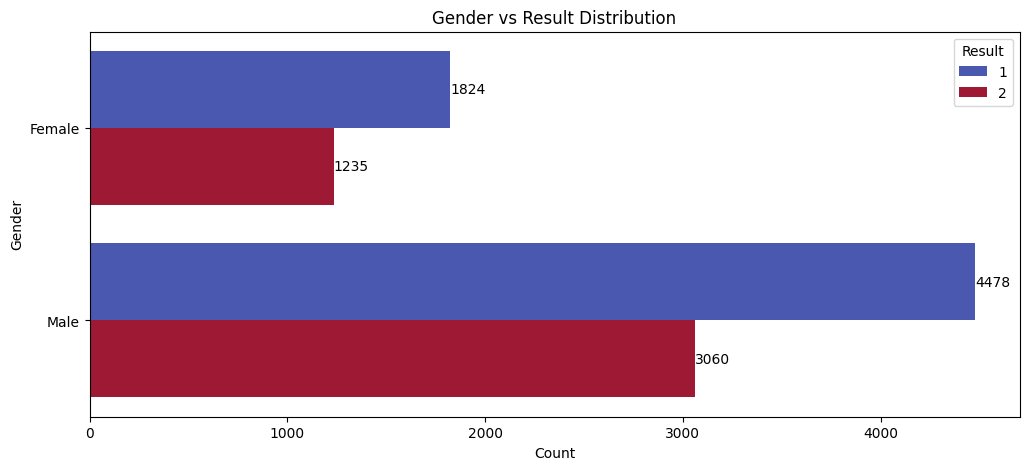

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# แปลงค่า 0 และ 1 ใน gender ให้เป็น 'Male' และ 'Female'
df['Gender of the patient'] = df['Gender of the patient'].replace({0: 'Female', 1: 'Male'})

# ตั้งค่าขนาดของกราฟ
plt.figure(figsize=(12, 5))

# พล็อตกราฟแนวนอน
sns.countplot(data=df, y="Gender of the patient", hue="Result", palette="coolwarm")

# ใส่ชื่อแกนและ Title
plt.ylabel("Gender")  # แกน Y เป็น Gender
plt.xlabel("Count")  # แกน X เป็นจำนวน
plt.title("Gender vs Result Distribution")  # ชื่อกราฟ

# แสดงค่าบนแท่งกราฟ
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt="%d")

plt.show()
